In [1]:
#Import pandas and numpy library
import pandas as pd
import numpy as np

#Import libraries for graphs
import matplotlib.pyplot as plt
import seaborn as sns

#Read the xlsx file and correct sheet in the file
data = pd.read_excel (r'C:\Users\krist\programska\Project\\WBL_19712022.xlsx', sheet_name='WBL Panel 2022')

#Some columns are not necessary so I just read in what I need and put it in a dataframe
df = pd.DataFrame(data, columns = ['Economy', 'ISO Code', 'Region', 'Income Group', 'Report Year', 'WBL INDEX', 'MOBILITY', 'Can a woman choose where to live in the same way as a man?', 'Can a woman travel outside her home in the same way as a man?', 'Can a woman apply for a passport in the same way as a man?', 'Can a woman travel outside the country in the same way as a man?', 
                                   'WORKPLACE', 'Can a woman get a job in the same way as a man?', 'Does the law prohibit discrimination in employment based on gender?', 'Is there legislation on sexual harassment in employment?', 'Are there criminal penalties or civil remedies for sexual harassment in employment?', 
                                   'PAY', 'Does the law mandate equal remuneration for work of equal value?', 'Can a woman work at night in the same way as a man?', 'Can a woman work in a job deemed dangerous in the same way as a man?', 'Can a woman work in an industrial job in the same way as a man?',
                                   'MARRIAGE', 'Is there no legal provision that requires a married woman to obey her husband?', 'Can a woman be head of household in the same way as a man?', 'Is there legislation specifically addressing domestic violence?', 'Can a woman obtain a judgment of divorce in the same way as a man?', 'Does a woman have the same rights to remarry as a man?',
                                   'PARENTHOOD', 'Is paid leave of at least 14 weeks available to mothers?', 'Length of paid maternity leave', 'Does the government administer 100% of maternity leave benefits?', 'Is there paid leave available to fathers?', 'Length of paid paternity leave', 'Is there paid parental leave?', 'Shared days', 'Days for the mother', 'Days for the father', 'Is dismissal of pregnant workers prohibited?',
                                   'ENTREPRENEURSHIP', 'Does the law prohibit discrimination in access to credit based on gender?', 'Can a woman sign a contract in the same way as a man?', 'Can a woman register a business in the same way as a man?', 'Can a woman open a bank account in the same way as a man?',
                                   'ASSETS', 'Do men and women have equal ownership rights to immovable property?', 'Do sons and daughters have equal rights to inherit assets from their parents?', 'Do male and female surviving spouses have equal rights to inherit assets?', 'Does the law grant spouses equal administrative authority over assets during marriage?', 'Does the law provide for the valuation of nonmonetary contributions?',
                                   'PENSION', 'Is the age at which men and women can retire with full pension benefits the same?', 'Is the age at which men and women can retire with partial pension benefits the same?', 'Is the mandatory retirement age for men and women the same?', 'Are periods of absence due to childcare accounted for in pension benefits?'])


In [2]:
#Rename the columns so they are easier to work with
df.columns=['country', 'ISO_code', 'region', 'income_group', 'year', 'INDEX', 'MOBILITY', 'choose_where_live', 'travel_outside_home', 'apply_passport', 'international_travel', 
                                   'WORKPLACE', 'job', 'emp_discr', 'leg_sex_harassment', 'penal_sex_harassment', 
                                   'PAY', 'equal_pay', 'work_night', 'danger_job', 'indust_job',
                                   'MARRIAGE', 'obey_husband', 'head_household', 'dom_violence', 'divorce', 'remarry',
                                   'PARENTHOOD', '14_wk_leave', 'length_mat_leave', 'leave_benefit', 'paternal_leave', 'length_pat_leave', 'pat_paid', 'shared_days', 'mat_days', 'pat_days', 'pregnant',
                                   'ENTRE', 'credit', 'contract', 'register_bus', 'bank_account',
                                   'ASSETS', 'prop_owner', 'daught_inherit', 'spouses_inherit', 'admin_autho_assets', 'value_nonmon_cont',
                                   'PENSION', 'retire_age', 'retire_partial', 'mandatory_age', 'childcare_accounted']

df.head()

,country,ISO_code,region,income_group,year,INDEX,MOBILITY,choose_where_live,travel_outside_home,apply_passport,...,prop_owner,daught_inherit,spouses_inherit,admin_autho_assets,value_nonmon_cont,PENSION,retire_age,retire_partial,mandatory_age,childcare_accounted
0,Afghanistan,AFG,South Asia,Low income,1971,26.25,25,No,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
1,Afghanistan,AFG,South Asia,Low income,1972,26.25,25,No,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
2,Afghanistan,AFG,South Asia,Low income,1973,26.25,25,No,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
3,Afghanistan,AFG,South Asia,Low income,1974,26.25,25,No,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
4,Afghanistan,AFG,South Asia,Low income,1975,26.25,25,No,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No


In [3]:
#Add an ID column to my main data because I like to have unique ID in my original data.
df.insert(0,'ID', range(1,1+len(df))) #let the ID numbering start at 1 and continue for the length of the dataset.

In [4]:
#Change the ID to string
df['ID'] = df['ID'].map(str)
df.head()

,ID,country,ISO_code,region,income_group,year,INDEX,MOBILITY,choose_where_live,travel_outside_home,...,prop_owner,daught_inherit,spouses_inherit,admin_autho_assets,value_nonmon_cont,PENSION,retire_age,retire_partial,mandatory_age,childcare_accounted
0,1,Afghanistan,AFG,South Asia,Low income,1971,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
1,2,Afghanistan,AFG,South Asia,Low income,1972,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
2,3,Afghanistan,AFG,South Asia,Low income,1973,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
3,4,Afghanistan,AFG,South Asia,Low income,1974,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
4,5,Afghanistan,AFG,South Asia,Low income,1975,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No


In [5]:
#Check out datatypes. index should be numeric and questions are string.
df.dtypes

ID                       object
country                  object
ISO_code                 object
region                   object
income_group             object
year                      int64
INDEX                   float64
MOBILITY                  int64
choose_where_live        object
travel_outside_home      object
apply_passport           object
international_travel     object
WORKPLACE                 int64
job                      object
emp_discr                object
leg_sex_harassment       object
penal_sex_harassment     object
PAY                       int64
equal_pay                object
work_night               object
danger_job               object
indust_job               object
MARRIAGE                  int64
obey_husband             object
head_household           object
dom_violence             object
divorce                  object
remarry                  object
PARENTHOOD                int64
14_wk_leave              object
length_mat_leave          int64
leave_be

In [6]:
#Find basic stats on the data.
#What is the min, max, and average for each subindex?
df.describe()

,year,INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,length_mat_leave,length_pat_leave,shared_days,mat_days,pat_days,ENTRE,ASSETS,PENSION
count,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000
mean,1996.500000,59.341726,82.004049,42.279858,46.971154,61.564777,34.514170,84.793623,1.652024,37.798178,5.049696,3.473077,72.426619,73.730769,61.242409
std,15.009091,18.462519,25.808752,33.306910,31.217633,29.680296,30.380167,62.061651,6.490103,158.737439,40.041873,27.145298,21.263002,29.111212,29.004163
min,1971.000000,17.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1983.750000,46.875000,75.000000,25.000000,25.000000,40.000000,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,75.000000,40.000000,25.000000
50%,1996.500000,58.750000,100.000000,25.000000,50.000000,80.000000,20.000000,84.000000,0.000000,0.000000,0.000000,0.000000,75.000000,80.000000,75.000000
75%,2009.250000,72.500000,100.000000,50.000000,75.000000,80.000000,60.000000,98.000000,0.000000,0.000000,0.000000,0.000000,75.000000,100.000000,75.000000
max,2022.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,635.000000,180.000000,1460.000000,1095.000000,365.000000,100.000000,100.000000,100.000000


In [7]:
#Make sure all my records are there
df.shape

(9880, 55)

In [8]:
#Check for missing values
#Yay! No blank data.
df.isnull().sum() #This function will give the sum of null values by field

ID                      0
country                 0
ISO_code                0
region                  0
income_group            0
year                    0
INDEX                   0
MOBILITY                0
choose_where_live       0
travel_outside_home     0
apply_passport          0
international_travel    0
WORKPLACE               0
job                     0
emp_discr               0
leg_sex_harassment      0
penal_sex_harassment    0
PAY                     0
equal_pay               0
work_night              0
danger_job              0
indust_job              0
MARRIAGE                0
obey_husband            0
head_household          0
dom_violence            0
divorce                 0
remarry                 0
PARENTHOOD              0
14_wk_leave             0
length_mat_leave        0
leave_benefit           0
paternal_leave          0
length_pat_leave        0
pat_paid                0
shared_days             0
mat_days                0
pat_days                0
pregnant    

In [9]:
#Read csv file for ISO region codes
data2 = pd.read_csv(r'C:\Users\krist\programska\Project\ISO_3166_Countries_With_Regional_Codes.csv')

#Put data in dataframe
regiondf = pd.DataFrame(data2)
regiondf.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,Unnamed: 11
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN,NaN


In [10]:
#Trim down to just what I need for analysis
regiondf=regiondf[['name', 'alpha-3', 'region', 'sub-region', 'intermediate-region']]
regiondf.head()

,name,alpha-3,region,sub-region,intermediate-region
0,Afghanistan,AFG,Asia,Southern Asia,NaN
1,Åland Islands,ALA,Europe,Northern Europe,NaN
2,Albania,ALB,Europe,Southern Europe,NaN
3,Algeria,DZA,Africa,Northern Africa,NaN
4,American Samoa,ASM,Oceania,Polynesia,NaN


In [11]:
#Rename ISO region columns for clarity
regiondf.columns=['ISO_country', 'ISO_code', 'ISO_region', 'ISO_subregion', 'ISO_intermed']
regiondf.head()

,ISO_country,ISO_code,ISO_region,ISO_subregion,ISO_intermed
0,Afghanistan,AFG,Asia,Southern Asia,NaN
1,Åland Islands,ALA,Europe,Northern Europe,NaN
2,Albania,ALB,Europe,Southern Europe,NaN
3,Algeria,DZA,Africa,Northern Africa,NaN
4,American Samoa,ASM,Oceania,Polynesia,NaN


In [12]:
#Check data types. They should all be object since it is categorical data with alpha names.
regiondf.dtypes

ISO_country      object
ISO_code         object
ISO_region       object
ISO_subregion    object
ISO_intermed     object
dtype: object

In [13]:
#Check for null in regiondf. I know not every country has an intermediate region. That is fine.
regiondf.isnull().sum() #This function will give the sum of null values by field

ISO_country        0
ISO_code           0
ISO_region         1
ISO_subregion      1
ISO_intermed     142
dtype: int64

In [14]:
#Figure out what row has a blank in ISO_region. This could be a problem.
null_columns = regiondf.columns[regiondf.isnull().any()] #pull out the nulls
print(regiondf[regiondf['ISO_region'].isnull()][null_columns]) #print the row that has null in ISO_region

  ISO_region ISO_subregion ISO_intermed
8        NaN           NaN          NaN


In [15]:
#Looks like Antarctica doesn't have ISO data
missing = regiondf.loc[8] #locate record index 8
print(missing)

ISO_country      Antarctica
ISO_code                ATA
ISO_region              NaN
ISO_subregion           NaN
ISO_intermed            NaN
Name: 8, dtype: object


In [16]:
#Check original df for Antartica. It does not appear we have WLB data for Antarctica, so the missing ISO_region value is fine.
df.loc[df['country']=='Antarctica']

,ID,country,ISO_code,region,income_group,year,INDEX,MOBILITY,choose_where_live,travel_outside_home,...,prop_owner,daught_inherit,spouses_inherit,admin_autho_assets,value_nonmon_cont,PENSION,retire_age,retire_partial,mandatory_age,childcare_accounted


In [17]:
#Add the ISO region data to my main dataset
newdf = pd.merge(df, regiondf, how='left', on=['ISO_code']) # left join and link on ISO_code
newdf.head()

,ID,country,ISO_code,region,income_group,year,INDEX,MOBILITY,choose_where_live,travel_outside_home,...,value_nonmon_cont,PENSION,retire_age,retire_partial,mandatory_age,childcare_accounted,ISO_country,ISO_region,ISO_subregion,ISO_intermed
0,1,Afghanistan,AFG,South Asia,Low income,1971,26.25,25,No,No,...,No,25,No,No,Yes,No,Afghanistan,Asia,Southern Asia,NaN
1,2,Afghanistan,AFG,South Asia,Low income,1972,26.25,25,No,No,...,No,25,No,No,Yes,No,Afghanistan,Asia,Southern Asia,NaN
2,3,Afghanistan,AFG,South Asia,Low income,1973,26.25,25,No,No,...,No,25,No,No,Yes,No,Afghanistan,Asia,Southern Asia,NaN
3,4,Afghanistan,AFG,South Asia,Low income,1974,26.25,25,No,No,...,No,25,No,No,Yes,No,Afghanistan,Asia,Southern Asia,NaN
4,5,Afghanistan,AFG,South Asia,Low income,1975,26.25,25,No,No,...,No,25,No,No,Yes,No,Afghanistan,Asia,Southern Asia,NaN


In [18]:
#Create new dataframe that just has the index summaries
indexdf = newdf[['country', 'ISO_code', 'ISO_region', 'ISO_subregion', 'ISO_intermed', 'region', 'income_group', 'year', 'INDEX', 'MOBILITY', 'WORKPLACE', 'PAY', 'MARRIAGE', 'PARENTHOOD', 'ENTRE', 'ASSETS', 'PENSION']]
indexdf.head()

,country,ISO_code,ISO_region,ISO_subregion,ISO_intermed,region,income_group,year,INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTRE,ASSETS,PENSION
0,Afghanistan,AFG,Asia,Southern Asia,NaN,South Asia,Low income,1971,26.25,25,25,0,20,0,75,40,25
1,Afghanistan,AFG,Asia,Southern Asia,NaN,South Asia,Low income,1972,26.25,25,25,0,20,0,75,40,25
2,Afghanistan,AFG,Asia,Southern Asia,NaN,South Asia,Low income,1973,26.25,25,25,0,20,0,75,40,25
3,Afghanistan,AFG,Asia,Southern Asia,NaN,South Asia,Low income,1974,26.25,25,25,0,20,0,75,40,25
4,Afghanistan,AFG,Asia,Southern Asia,NaN,South Asia,Low income,1975,26.25,25,25,0,20,0,75,40,25


In [19]:
#Create dataframe for parenthood questions if I want to look at this subindex individually
parentdf=newdf[['country', 'ISO_code', 'ISO_region', 'ISO_subregion', 'ISO_intermed', 'region', 'income_group', 'year', 'INDEX', 'PARENTHOOD', '14_wk_leave', 'length_mat_leave', 'leave_benefit', 'paternal_leave', 'length_pat_leave', 'pat_paid', 'shared_days', 'mat_days', 'pat_days', 'pregnant']]
parentdf.head()                           

,country,ISO_code,ISO_region,ISO_subregion,ISO_intermed,region,income_group,year,INDEX,PARENTHOOD,14_wk_leave,length_mat_leave,leave_benefit,paternal_leave,length_pat_leave,pat_paid,shared_days,mat_days,pat_days,pregnant
0,Afghanistan,AFG,Asia,Southern Asia,NaN,South Asia,Low income,1971,26.25,0,No,0,No,No,0,No,0,0,0,No
1,Afghanistan,AFG,Asia,Southern Asia,NaN,South Asia,Low income,1972,26.25,0,No,0,No,No,0,No,0,0,0,No
2,Afghanistan,AFG,Asia,Southern Asia,NaN,South Asia,Low income,1973,26.25,0,No,0,No,No,0,No,0,0,0,No
3,Afghanistan,AFG,Asia,Southern Asia,NaN,South Asia,Low income,1974,26.25,0,No,0,No,No,0,No,0,0,0,No
4,Afghanistan,AFG,Asia,Southern Asia,NaN,South Asia,Low income,1975,26.25,0,No,0,No,No,0,No,0,0,0,No


In [20]:
#Q1 What countries have the highest WBL index number?
highest = indexdf.groupby(['ISO_region','country'])[['INDEX']].max() #To find the highest index score for each country, also group by region
sort_highest = highest.sort_values(by=['INDEX'], ascending=False) #Sort values by WBL Index with the highest values first.
print(sort_highest)
sort_highest.to_csv('1_Highest_WBL_Index_by_Country.csv') #save as csv

                                 INDEX
ISO_region country                    
Europe     Portugal            100.000
Americas   Canada              100.000
Europe     Luxembourg          100.000
           Belgium             100.000
           Sweden              100.000
...                                ...
Asia       Kuwait               35.000
           Iran, Islamic Rep.   31.250
Africa     Sudan                29.375
Asia       Qatar                29.375
           Yemen, Rep.          26.875

[189 rows x 1 columns]


In [21]:
#It looks like several countries have a score of 100. I wonder how many countries?
#Get the highest score for each country
highdf = indexdf.groupby(['ISO_region','ISO_subregion','country'])[['INDEX']].max()
#Pull out just the ones that are 100
index100 = highdf[highdf['INDEX']==100]

In [22]:
print('The number of countries that have received a WBL Index of 100: ',len(index100)) #find how many there are

The number of countries that have received a WBL Index of 100:  12


In [23]:
index100.to_csv('1_Countries_WBL_Index_100.csv') #save list as csv

In [24]:
#Europe was well represented on this list
#What regions have the higest average WBL index number and lowest average WBL index number?
#Let's look at data for the most recent year.
#Pull out records for the most recent year
recentdf = indexdf[indexdf['year']==2022]
#This time I use an average for each region
avgregion = recentdf.groupby('ISO_region')[['INDEX']].mean() #to find the average index score for each region
print(avgregion.sort_values(by=['INDEX'], ascending=False)) #to display results high to low

                INDEX
ISO_region           
Europe      93.296875
Americas    81.267857
Africa      70.312500
Oceania     70.208333
Asia        67.421875


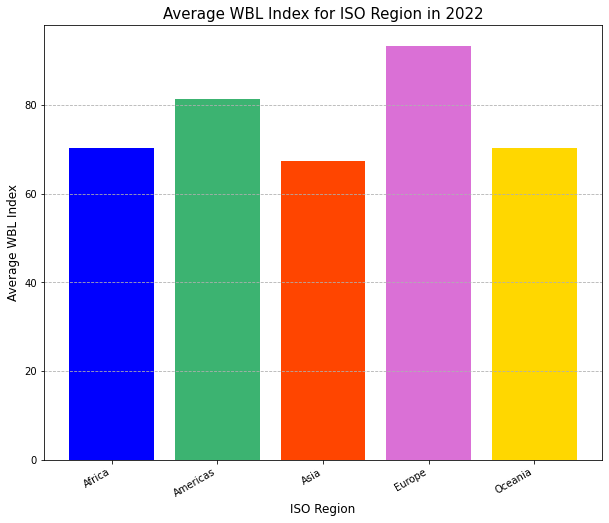

In [25]:
#Display the average for each region as a bar chart
plt.rcParams['figure.figsize'] = (10, 8) #Set the parameters for the chart.
plt.title('Average WBL Index for ISO Region in 2022', fontsize = 15) #Title the chart.
plt.xlabel('ISO Region', fontsize = 12) #Label the xaxis
plt.ylabel('Average WBL Index', fontsize = 12) #Label the yaxis
plt.xticks(rotation = 30, ha='right') #Format the xaxis region name labels to angle up to the right.
#Because the index is the region name, I put that on the x axis and index on the y axis
plt.bar(avgregion.index, avgregion['INDEX'], color = ('blue', 'mediumseagreen', 'orangered', 'orchid', 'gold'))
plt.grid(linestyle='--',axis='y')
plt.savefig('1_Avg_Index_By_Region_2022.jpg')
plt.show()

In [26]:
#Europe is clearly the highest, so I want to look at Europe in more detail
#First pull out just Europe
EUrecentdf = recentdf[recentdf['ISO_region']=='Europe']
EUrecentdf.head()

,country,ISO_code,ISO_region,ISO_subregion,ISO_intermed,region,income_group,year,INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTRE,ASSETS,PENSION
103,Albania,ALB,Europe,Southern Europe,NaN,Europe & Central Asia,Upper middle income,2022,91.250,100,100,100,100,80,100,100,50
467,Austria,AUT,Europe,Western Europe,NaN,High income: OECD,High income,2022,96.875,100,100,100,100,100,100,100,75
779,Belarus,BLR,Europe,Eastern Europe,NaN,Europe & Central Asia,Upper middle income,2022,75.625,100,50,50,100,80,75,100,50
831,Belgium,BEL,Europe,Western Europe,NaN,High income: OECD,High income,2022,100.000,100,100,100,100,100,100,100,100
1091,Bosnia and Herzegovina,BIH,Europe,Southern Europe,NaN,Europe & Central Asia,Upper middle income,2022,85.000,100,100,50,100,80,100,100,50


In [27]:
#Now find the average for each subregion
avgeurope = EUrecentdf.groupby('ISO_subregion')[['INDEX']].mean() #to find the average index score for each subregion
print(avgeurope.sort_values(by=['INDEX'], ascending=False)) #to display results high to low

                     INDEX
ISO_subregion             
Northern Europe  98.312500
Western Europe   97.142857
Southern Europe  92.067308
Eastern Europe   87.187500


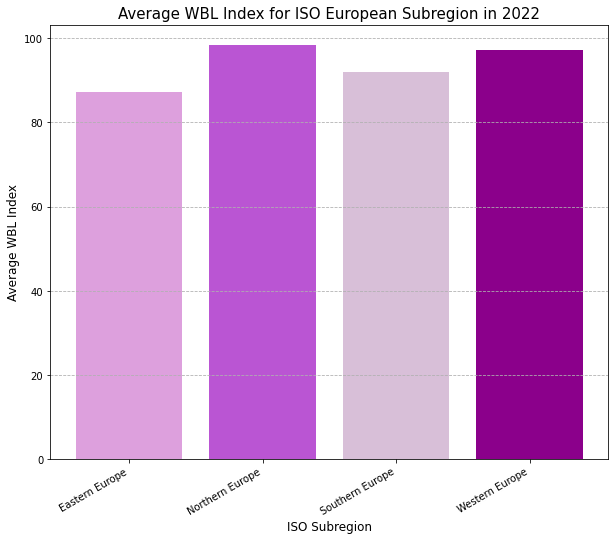

In [28]:
#Plot the subregions
plt.rcParams['figure.figsize'] = (10, 8) #Set the parameters for the chart.
plt.title('Average WBL Index for ISO European Subregion in 2022', fontsize = 15) #Title the chart.
plt.xlabel('ISO Subregion', fontsize = 12) #Label the xaxis
plt.ylabel('Average WBL Index', fontsize = 12) #Label the yaxis
plt.xticks(rotation = 30, ha='right') #Format the xaxis region name labels to angle up to the right.
#Because the index is the subregion name, I put that on the x axis and Index on the y axis
plt.bar(avgeurope.index, avgeurope['INDEX'], color = ('plum', 'mediumorchid', 'thistle', 'darkmagenta'))
plt.grid(linestyle='--',axis='y')
plt.savefig('1_Avg_Index_Europe_By_Subregion_2022.jpg')
plt.show()

In [29]:
#Asia was the lowest region for the average WBL index in 2022. Look at Asia in more detail.
#First pull out just Asia
Asiarecentdf = recentdf[recentdf['ISO_region']=='Asia']
Asiarecentdf.head()

,country,ISO_code,ISO_region,ISO_subregion,ISO_intermed,region,income_group,year,INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTRE,ASSETS,PENSION
51,Afghanistan,AFG,Asia,Southern Asia,NaN,South Asia,Low income,2022,38.125,50,75,0,20,20,75,40,25
363,Armenia,ARM,Asia,Western Asia,NaN,Europe & Central Asia,Upper middle income,2022,87.500,100,50,75,100,100,75,100,100
519,Azerbaijan,AZE,Asia,Western Asia,NaN,Europe & Central Asia,Upper middle income,2022,78.750,100,100,0,100,80,100,100,50
623,Bahrain,BHR,Asia,Western Asia,NaN,Middle East & North Africa,High income,2022,65.000,50,75,100,40,40,100,40,75
675,Bangladesh,BGD,Asia,Southern Asia,NaN,South Asia,Lower middle income,2022,49.375,100,50,25,60,20,75,40,25


In [30]:
#Now find the average for each subregion
avgasia = Asiarecentdf.groupby('ISO_subregion')[['INDEX']].mean() #to find the average index score for each subregion
print(avgasia.sort_values(by=['INDEX'], ascending=False)) #to display results high to low

                        INDEX
ISO_subregion                
Eastern Asia        84.583333
Central Asia        73.906250
South-eastern Asia  73.295455
Western Asia        60.347222
Southern Asia       60.069444


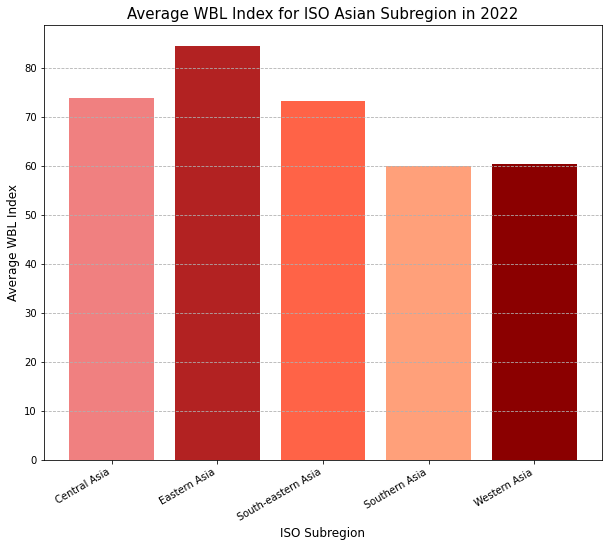

In [31]:
#Plot the subregions
plt.rcParams['figure.figsize'] = (10, 8) #Set the parameters for the chart.
plt.title('Average WBL Index for ISO Asian Subregion in 2022', fontsize = 15) #Title the chart.
plt.xlabel('ISO Subregion', fontsize = 12) #Label the xaxis
plt.ylabel('Average WBL Index', fontsize = 12) #Label the yaxis
plt.xticks(rotation = 30, ha='right') #Format the xaxis region name labels to angle up to the right.
#Because the index is the subregion name, I put that on the x axis and Index on the y axis
plt.bar(avgasia.index, avgasia['INDEX'], color = ('lightcoral', 'firebrick', 'tomato', 'lightsalmon', 'darkred'))
plt.grid(linestyle='--',axis='y')
plt.savefig('1_Avg_Index_Asia_By_Subregion_2022.jpg')
plt.show()

In [32]:
#Q2 What subindicies are the highest and lowest?
avgSubindexdf = indexdf[['MOBILITY', 'WORKPLACE', 'PAY', 'MARRIAGE', 'PARENTHOOD', 'ENTRE', 'ASSETS', 'PENSION']].mean() #to find the average subindex score for dataset
print(avgSubindexdf.sort_values(ascending=False)) #sort high to low

MOBILITY      82.004049
ASSETS        73.730769
ENTRE         72.426619
MARRIAGE      61.564777
PENSION       61.242409
PAY           46.971154
WORKPLACE     42.279858
PARENTHOOD    34.514170
dtype: float64


In [33]:
#What subindicies are the highest and lowest for each region?
avgSubindexdf2 = indexdf.groupby('ISO_region')[['MOBILITY', 'WORKPLACE', 'PAY', 'MARRIAGE', 'PARENTHOOD', 'ENTRE', 'ASSETS', 'PENSION']].mean() #to find the average subindex score for dataset
print(avgSubindexdf2)
avgSubindexdf2.to_csv('2_Avg_Subindex_By_Region.csv') #save as csv

             MOBILITY  WORKPLACE        PAY   MARRIAGE  PARENTHOOD      ENTRE  \
ISO_region                                                                      
Africa      75.569801  34.196937  42.120726  47.656695   28.176638  61.235755   
Americas    86.414835  46.991758  60.453297  67.824176   31.439560  74.285714   
Asia        71.013622  36.568510  31.730769  51.474359   24.190705  74.759615   
Europe      97.656250  56.334135  57.115385  80.115385   66.019231  80.685096   
Oceania     88.381410  39.943910  53.565705  82.275641    6.730769  79.607372   

               ASSETS    PENSION  
ISO_region                        
Africa      56.189459  65.019587  
Americas    88.043956  72.074176  
Asia        68.285256  48.888221  
Europe      97.230769  59.627404  
Oceania     52.179487  68.669872  


AxesSubplot(0.125,0.125;0.775x0.755)


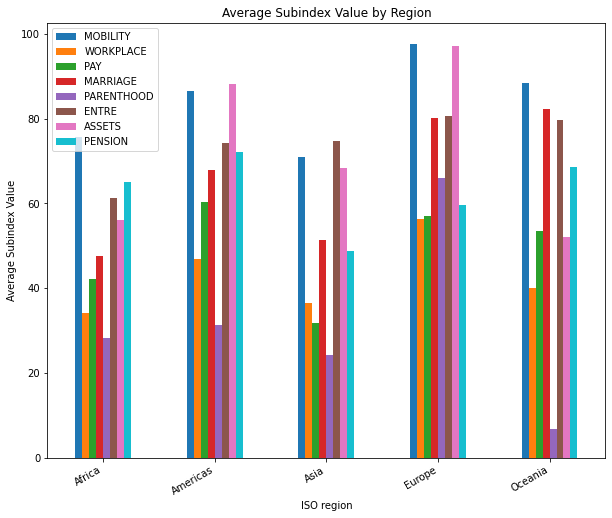

In [34]:
#plot the table in barchart
dplot = avgSubindexdf2.plot.bar(stacked=False, color=('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:cyan'))
labels = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'] #label regions
leglabs = ['MOBILITY', 'WORKPLACE', 'PAY', 'MARRIAGE', 'PARENTHOOD', 'ENTRE', 'ASSETS', 'PENSION'] #label bars in legend
dplot.legend(leglabs)
dplot.set_ylabel('Average Subindex Value') #set y axis label
dplot.set_xlabel('ISO region') #set x axis label
dplot.set_title('Average Subindex Value by Region') #set chart title
dplot.set_xticklabels(labels)
plt.xticks(rotation = 30, ha='right') #Format the xaxis region name labels to angle up to the right.
print(dplot) #display chart
plt.savefig('2_Avg_Subindex_By_Region.jpg') #save as jpg

In [35]:
#Q3 What is the standard deviation for the indicies within regions?
#It occurs to me that the Africa region has countries such as Sudan, with an index of 29.4 in 2022 and countries such as South Africa, with an index of 88.1 in 2022.
stdSubindexdf = indexdf.groupby('ISO_region')[['INDEX','MOBILITY', 'WORKPLACE', 'PAY', 'MARRIAGE', 'PARENTHOOD', 'ENTRE', 'ASSETS', 'PENSION']].std() #to find the standard deviation for each subindex score by region
print(stdSubindexdf)
stdSubindexdf.to_csv('3_Std_Subindex_By_Region.csv') #save as csv

                INDEX   MOBILITY  WORKPLACE        PAY   MARRIAGE  PARENTHOOD  \
ISO_region                                                                      
Africa      15.327807  21.770071  33.215429  28.351552  28.772420   25.665800   
Americas    14.083300  15.459461  34.202650  23.555008  24.908670   23.594387   
Asia        18.558649  37.649292  30.032276  27.600594  32.726316   26.887767   
Europe      15.012421   8.819150  32.776172  36.043787  17.346486   24.741465   
Oceania     11.962596  13.408942  27.025434  27.325730   9.908781   18.260236   

                ENTRE     ASSETS    PENSION  
ISO_region                                   
Africa      28.196988  27.901471  28.947663  
Americas    19.339299  16.563412  24.111991  
Asia        14.242472  27.952586  27.349807  
Europe      14.396614  10.288041  31.613925  
Oceania      9.700888  34.301933  19.729145  


In [36]:
#Find min and max and standard deviation for WBL index by region
index_minmax = (indexdf.pivot_table(index='ISO_region', values='INDEX', aggfunc=['min', 'max', 'std'], fill_value=0))
print(index_minmax)
index_minmax.to_csv('3_WBL_MinMax_By_Region.csv') #save as csv

               min      max        std
             INDEX    INDEX      INDEX
ISO_region                            
Africa      17.500   89.375  15.327807
Americas    30.625  100.000  14.083300
Asia        17.500   94.375  18.558649
Europe      33.750  100.000  15.012421
Oceania     41.250   97.500  11.962596


In [37]:
#But this is all years' data.
#Is the standard dev so large for just 2022 data?
index_2022minmax = (recentdf.pivot_table(index='ISO_region', values='INDEX', aggfunc=['min', 'max', 'std'], fill_value=0))
print(index_2022minmax)
index_2022minmax.to_csv('3_WBL_2022MinMax_By_Region.csv') #save as csv

               min      max        std
             INDEX    INDEX      INDEX
ISO_region                            
Africa      29.375   89.375  13.747722
Americas    61.250  100.000   9.304250
Asia        26.250   94.375  19.767862
Europe      73.125  100.000   7.147131
Oceania     55.625   97.500  15.340208


In [38]:
#What does the standard deviations look like for all indicies for 2022 data?
std2022Subindexdf = recentdf.groupby('ISO_region')[['INDEX','MOBILITY', 'WORKPLACE', 'PAY', 'MARRIAGE', 'PARENTHOOD', 'ENTRE', 'ASSETS', 'PENSION']].std() #to find the standard deviation for each subindex score by region
print(std2022Subindexdf)
std2022Subindexdf.to_csv('3_Std_2022_Subindex_By_Region.csv') #save as csv

                INDEX   MOBILITY  WORKPLACE        PAY   MARRIAGE  PARENTHOOD  \
ISO_region                                                                      
Africa      13.747722  20.693978  28.178452  30.987278  29.543463   22.792474   
Americas     9.304250  12.964074  28.752055  19.119263  13.144319   28.367338   
Asia        19.767862  30.052407  32.781615  32.304890  32.678859   29.890462   
Europe       7.147131   0.000000  13.736882  22.636693   6.076436   11.886213   
Oceania     15.340208  12.309149  36.084392  27.866021   5.773503   36.306774   

                ENTRE     ASSETS    PENSION  
ISO_region                                   
Africa      21.943681  27.400796  24.479202  
Americas    13.480456  10.273569  17.513500  
Asia        13.965510  27.470164  28.403126  
Europe       8.373302   0.000000  28.278605  
Oceania     12.309149  37.294894   7.216878  


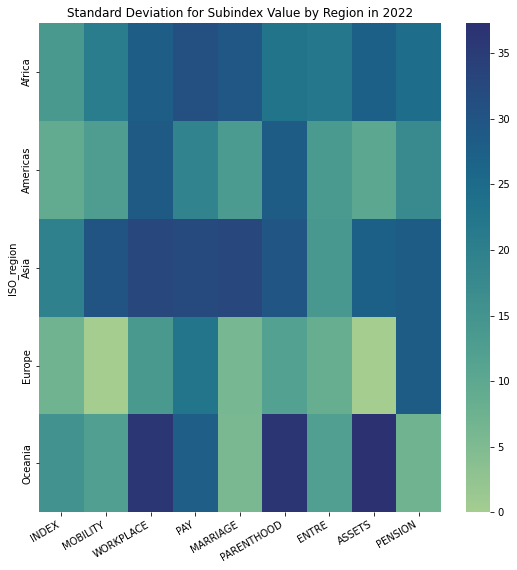

In [39]:
#This is a lot of data and difficult to compare. Can I make a heat map to better understand where the extreams are?
#use seaborn to create a heatmap
plt.rcParams['figure.figsize'] = (9,9) #Set the parameters for the chart.
sns.heatmap(std2022Subindexdf, cmap='crest') #Plot data
plt.xticks(rotation = 30, ha='right') #Format the xaxis region name labels to angle up to the right.
plt.title('Standard Deviation for Subindex Value by Region in 2022')
plt.savefig('3_Std_2022_Subindex_By_Region.jpg')

In [40]:
#I wonder if we split the 2022 data by income group what would we find?
std2022Subindexdf2 = recentdf.groupby('income_group')[['INDEX','MOBILITY', 'WORKPLACE', 'PAY', 'MARRIAGE', 'PARENTHOOD', 'ENTRE', 'ASSETS', 'PENSION']].std() #to find the standard deviation for each subindex score by region
print(std2022Subindexdf2)

                         INDEX   MOBILITY  WORKPLACE        PAY   MARRIAGE  \
income_group                                                                 
High income          16.814039  18.147699  25.054765  23.697260  21.067977   
Low income           17.369171  26.764644  31.086109  35.841532  31.496031   
Lower middle income  14.609014  21.923497  29.601734  30.130189  28.403063   
Upper middle income  13.258919  17.657661  30.928779  25.429938  24.587088   

                     PARENTHOOD      ENTRE     ASSETS    PENSION  
income_group                                                      
High income           33.965189  11.889872  23.023362  22.089332  
Low income            22.257237  16.554107  28.153426  28.216198  
Lower middle income   24.971364  18.768930  26.208180  25.893137  
Upper middle income   30.488729  17.770746  25.157123  24.829737  


In [41]:
#I realize that I need to force a new sort of the data so it is presented logically
#I will create a new column for custom sorting
df_mapping=pd.DataFrame({'income_group': ['High income', 'Upper middle income', 'Lower middle income', 'Low income'],}) #create a mapping dataframe for the custom sort
sort_mapping=df_mapping.reset_index().set_index('income_group')
#create a new column income_num with mapped value from sort_mapping
recentdf['income_num'] = recentdf['income_group'].map(sort_mapping['index'])
#sort values by the new column income_num
recentdf.sort_values('income_num')

C:\Users\krist\AppData\Local\Temp/ipykernel_5916/4244840318.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recentdf['income_num'] = recentdf['income_group'].map(sort_mapping['index'])


,country,ISO_code,ISO_region,ISO_subregion,ISO_intermed,region,income_group,year,INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTRE,ASSETS,PENSION,income_num
3275,Germany,DEU,Europe,Western Europe,NaN,High income: OECD,High income,2022,97.500,100,100,100,100,80,100,100,100,0
7799,Singapore,SGP,Asia,South-eastern Asia,NaN,East Asia & Pacific,High income,2022,82.500,100,75,75,100,60,75,100,75,0
7851,Slovak Republic,SVK,Europe,Eastern Europe,NaN,High income: OECD,High income,2022,85.000,100,100,75,100,80,100,100,25,0
3899,Iceland,ISL,Europe,Northern Europe,NaN,High income: OECD,High income,2022,100.000,100,100,100,100,100,100,100,100,0
3847,Hungary,HUN,Europe,Eastern Europe,NaN,High income: OECD,High income,2022,96.875,100,100,75,100,100,100,100,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8423,Sudan,SDN,Africa,Northern Africa,NaN,Sub-Saharan Africa,Low income,2022,29.375,0,0,0,0,20,75,40,100,3
2755,Eritrea,ERI,Africa,Sub-Saharan Africa,Eastern Africa,Sub-Saharan Africa,Low income,2022,69.375,100,100,75,60,20,75,100,25,3
8631,Syrian Arab Republic,SYR,Asia,Western Asia,NaN,Middle East & North Africa,Low income,2022,40.000,50,25,0,40,40,75,40,50,3
8943,Togo,TGO,Africa,Sub-Saharan Africa,Western Africa,Sub-Saharan Africa,Low income,2022,81.875,100,100,100,60,40,75,80,100,3


In [42]:
#now recreate the table
std2022Subindexdf3 = recentdf.groupby('income_num')[['INDEX','MOBILITY', 'WORKPLACE', 'PAY', 'MARRIAGE', 'PARENTHOOD', 'ENTRE', 'ASSETS', 'PENSION']].std() #to find the standard deviation for each subindex score by region
std2022Subindexdf3 = std2022Subindexdf3.rename(index={'0':'High income', '1':'Upper middle income', '2':'Lower middle income', '3':'Low income'})
std2022Subindexdf4 = std2022Subindexdf3.set_axis(['High income', 'Upper middle', 'Lower middle', 'Low income']) #relabel the index
print(std2022Subindexdf4)
std2022Subindexdf4.to_csv('3_Std_2022_Subindex_By_Income.csv') #save as csv

                  INDEX   MOBILITY  WORKPLACE        PAY   MARRIAGE  \
High income   16.814039  18.147699  25.054765  23.697260  21.067977   
Upper middle  13.258919  17.657661  30.928779  25.429938  24.587088   
Lower middle  14.609014  21.923497  29.601734  30.130189  28.403063   
Low income    17.369171  26.764644  31.086109  35.841532  31.496031   

              PARENTHOOD      ENTRE     ASSETS    PENSION  
High income    33.965189  11.889872  23.023362  22.089332  
Upper middle   30.488729  17.770746  25.157123  24.829737  
Lower middle   24.971364  18.768930  26.208180  25.893137  
Low income     22.257237  16.554107  28.153426  28.216198  


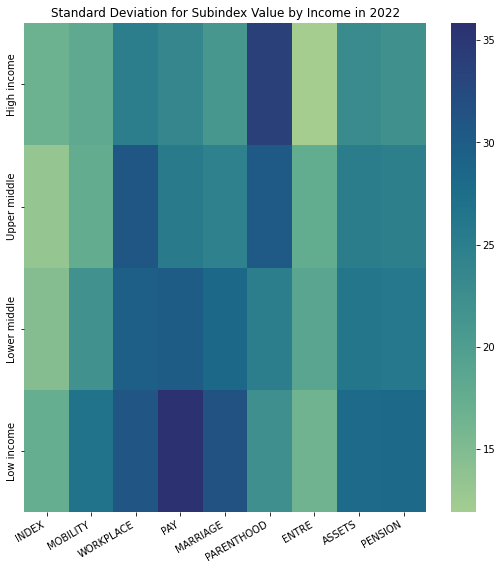

In [43]:
#Create the heatmap
plt.rcParams['figure.figsize'] = (9,9) #Set the parameters for the chart.
sns.heatmap(std2022Subindexdf4, cmap='crest') #plot data
plt.xticks(rotation = 30, ha='right') #set labels at an angle
plt.title('Standard Deviation for Subindex Value by Income in 2022') #set title
plt.savefig('3_Std_2022_Subindex_By_Income.jpg')

In [44]:
#Q4 Are there any trends in indices changing over time? For specific regions?
#Create a pivot for the WBL index
trenddf = indexdf.pivot_table(index = 'year', columns = 'ISO_region', values = 'INDEX', aggfunc = ['mean'], fill_value=0)
trenddf.head()

mean                                            
ISO_region     Africa   Americas       Asia     Europe    Oceania
year                                                             
1971        37.858796  48.535714  41.940104  55.937500  50.781250
1972        38.125000  49.214286  41.653646  55.640625  50.781250
1973        38.321759  49.892857  42.252604  56.562500  51.302083
1974        39.398148  51.053571  42.890625  57.546875  52.031250
1975        39.780093  51.517857  43.736979  58.062500  52.031250

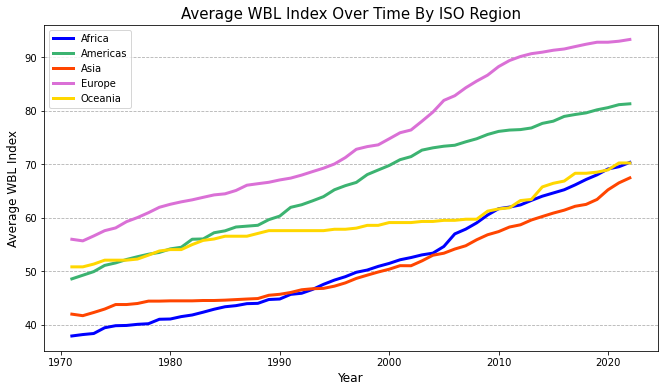

In [45]:
#Chart the data table
plt.rcParams['figure.figsize'] = (11, 6) #Set the parameters for the chart.
trendchart = trenddf.plot(kind = 'line', linewidth = 3.0, color=('blue', 'mediumseagreen', 'orangered', 'orchid', 'gold'))
plt.title('Average WBL Index Over Time By ISO Region', fontsize = 15) #Title the chart.
plt.xlabel('Year', fontsize = 12) #Label xaxis
plt.ylabel('Average WBL Index', fontsize = 12) #Label yaxis
plt.gca().legend(('Africa', 'Americas', 'Asia','Europe', 'Oceania')) #labels for legend
plt.grid(linestyle='--',axis='y')
plt.savefig('4_Avg_WBL_Trend_By_Region.jpg')
plt.show()

In [46]:
#Create a pivot for the Mobility Index
mobtrenddf = indexdf.pivot_table(index = 'year', columns = 'ISO_region', values = 'MOBILITY', aggfunc = ['mean'], fill_value=0)
mobtrenddf.head()

mean                                         
ISO_region     Africa   Americas       Asia  Europe    Oceania
year                                                          
1971        68.981481  73.571429  67.187500  88.750  83.333333
1972        69.444444  73.571429  67.187500  88.750  83.333333
1973        69.907407  73.571429  67.187500  88.750  83.333333
1974        69.907407  74.285714  67.708333  89.375  83.333333
1975        69.907407  76.428571  68.229167  90.000  83.333333

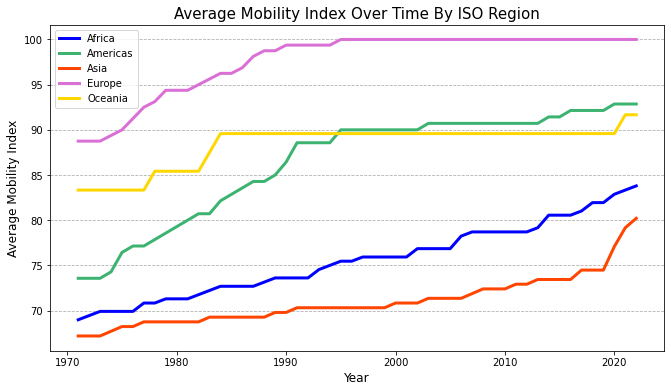

In [47]:
#Chart the data table
plt.rcParams['figure.figsize'] = (11, 6) #Set the parameters for the chart.
mobtrendchart = mobtrenddf.plot(kind = 'line', linewidth = 3.0, color=('blue', 'mediumseagreen', 'orangered', 'orchid', 'gold'))
plt.title('Average Mobility Index Over Time By ISO Region', fontsize = 15) #Title the chart.
plt.xlabel('Year', fontsize = 12) #Label xaxis
plt.ylabel('Average Mobility Index', fontsize = 12) #Label yaxis
plt.gca().legend(('Africa', 'Americas', 'Asia','Europe', 'Oceania')) #labels for legend
plt.grid(linestyle='--',axis='y')
plt.savefig('4_Avg_Mobility_Trend_By_Region.jpg')
plt.show()

In [48]:
#Create a pivot for the Workplace Index
worktrenddf = indexdf.pivot_table(index = 'year', columns = 'ISO_region', values = 'WORKPLACE', aggfunc = ['mean'], fill_value=0)
worktrenddf.head()

mean                                      
ISO_region     Africa   Americas       Asia  Europe Oceania
year                                                       
1971        12.037037  19.285714  18.229167  20.000    25.0
1972        12.037037  20.000000  18.229167  20.000    25.0
1973        12.037037  20.000000  18.750000  21.875    25.0
1974        13.425926  19.285714  20.312500  23.125    25.0
1975        13.425926  19.285714  21.354167  23.750    25.0

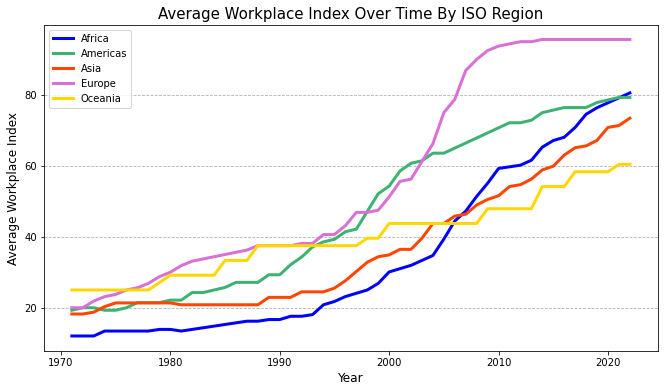

In [49]:
#Chart the data table
plt.rcParams['figure.figsize'] = (11, 6) #Set the parameters for the chart.
worktrendchart = worktrenddf.plot(kind = 'line', linewidth = 3.0, color=('blue', 'mediumseagreen', 'orangered', 'orchid', 'gold'))
plt.title('Average Workplace Index Over Time By ISO Region', fontsize = 15) #Title the chart.
plt.xlabel('Year', fontsize = 12) #Label xaxis
plt.ylabel('Average Workplace Index', fontsize = 12) #Label yaxis
plt.gca().legend(('Africa', 'Americas', 'Asia','Europe', 'Oceania')) #labels for legend
plt.grid(linestyle='--',axis='y')
plt.savefig('4_Avg_Workplace_Trend_By_Region.jpg')
plt.show()

In [50]:
#Create a pivot for the Pay Index
paytrenddf = indexdf.pivot_table(index = 'year', columns = 'ISO_region', values = 'PAY', aggfunc = ['mean'], fill_value=0)
paytrenddf.head()

mean                                       
ISO_region     Africa Americas       Asia  Europe    Oceania
year                                                        
1971        32.870370     50.0  24.479167  35.625  47.916667
1972        32.870370     50.0  24.479167  35.625  47.916667
1973        32.870370     50.0  24.479167  35.625  47.916667
1974        33.796296     50.0  24.479167  36.250  47.916667
1975        33.796296     50.0  24.479167  36.250  47.916667

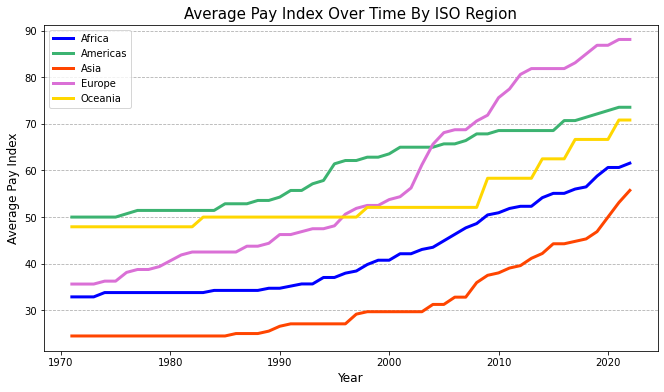

In [51]:
#Chart the data table
plt.rcParams['figure.figsize'] = (11, 6) #Set the parameters for the chart.
paytrendchart = paytrenddf.plot(kind = 'line', linewidth = 3.0, color=('blue', 'mediumseagreen', 'orangered', 'orchid', 'gold'))
plt.title('Average Pay Index Over Time By ISO Region', fontsize = 15) #Title the chart.
plt.xlabel('Year', fontsize = 12) #Label xaxis
plt.ylabel('Average Pay Index', fontsize = 12) #Label yaxis
plt.gca().legend(('Africa', 'Americas', 'Asia','Europe', 'Oceania')) #labels for legend
plt.grid(linestyle='--',axis='y')
plt.savefig('4_Avg_Pay_Trend_By_Region.jpg')
plt.show()

In [52]:
#Create a pivot for the Marriage Index
martrenddf = indexdf.pivot_table(index = 'year', columns = 'ISO_region', values = 'MARRIAGE', aggfunc = ['mean'], fill_value=0)
martrenddf.head()

mean                                        
ISO_region     Africa   Americas       Asia Europe    Oceania
year                                                         
1971        39.259259  44.000000  44.583333   64.5  76.666667
1972        39.629630  44.000000  45.000000   65.5  76.666667
1973        39.629630  44.000000  45.000000   66.0  76.666667
1974        40.000000  46.857143  45.000000   67.0  78.333333
1975        40.000000  48.000000  45.000000   67.0  78.333333

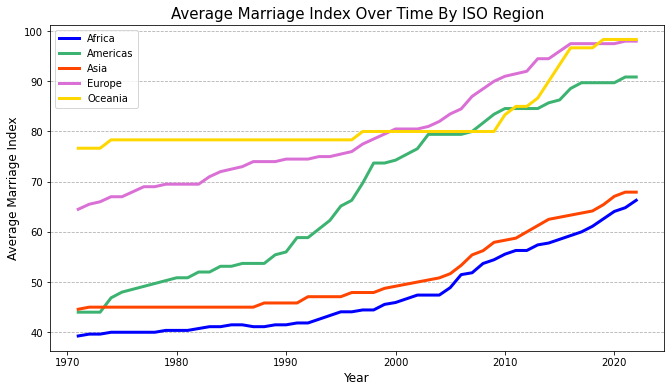

In [53]:
#Chart the data table
plt.rcParams['figure.figsize'] = (11, 6) #Set the parameters for the chart.
martrendchart = martrenddf.plot(kind = 'line', linewidth = 3.0, color=('blue', 'mediumseagreen', 'orangered', 'orchid', 'gold'))
plt.title('Average Marriage Index Over Time By ISO Region', fontsize = 15) #Title the chart.
plt.xlabel('Year', fontsize = 12) #Label xaxis
plt.ylabel('Average Marriage Index', fontsize = 12) #Label yaxis
plt.gca().legend(('Africa', 'Americas', 'Asia','Europe', 'Oceania')) #labels for legend
plt.grid(linestyle='--',axis='y')
plt.savefig('4_Avg_Marriage_Trend_By_Region.jpg')
plt.show()

In [54]:
#Create a pivot for the Parenthood Index
partrenddf = indexdf.pivot_table(index = 'year', columns = 'ISO_region', values = 'PARENTHOOD', aggfunc = ['mean'], fill_value=0)
partrenddf.head()

mean                                     
ISO_region     Africa   Americas       Asia Europe Oceania
year                                                      
1971        12.222222  16.000000   8.750000   35.0     0.0
1972        12.222222  16.000000   9.166667   36.0     0.0
1973        12.592593  17.142857  12.916667   41.0     0.0
1974        13.703704  17.714286  13.333333   42.5     0.0
1975        14.444444  18.285714  14.166667   43.0     0.0

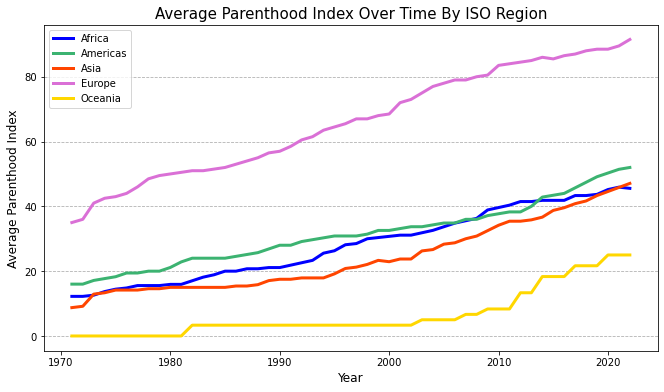

In [55]:
#Chart the data table
plt.rcParams['figure.figsize'] = (11, 6) #Set the parameters for the chart.
partrendchart = partrenddf.plot(kind = 'line', linewidth = 3.0, color=('blue', 'mediumseagreen', 'orangered', 'orchid', 'gold'))
plt.title('Average Parenthood Index Over Time By ISO Region', fontsize = 15) #Title the chart.
plt.xlabel('Year', fontsize = 12) #Label xaxis
plt.ylabel('Average Parenthood Index', fontsize = 12) #Label yaxis
plt.gca().legend(('Africa', 'Americas', 'Asia','Europe', 'Oceania')) #labels for legend
plt.grid(linestyle='--',axis='y')
plt.savefig('4_Avg_Parenthood_Trend_By_Region.jpg')
plt.show()

In [56]:
#Create a pivot for the Entreprenuership Index
enttrenddf = indexdf.pivot_table(index = 'year', columns = 'ISO_region', values = 'ENTRE', aggfunc = ['mean'], fill_value=0)
enttrenddf.head()

mean                                    
ISO_region     Africa   Americas     Asia  Europe Oceania
year                                                     
1971        48.611111  57.857143  70.3125  65.625    75.0
1972        48.611111  60.000000  70.3125  65.625    75.0
1973        48.611111  60.000000  70.3125  65.625    75.0
1974        50.000000  62.142857  70.3125  67.500    75.0
1975        50.000000  62.142857  71.8750  69.375    75.0

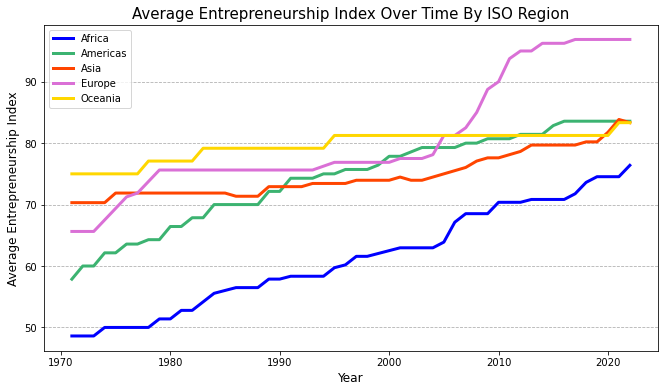

In [57]:
#Chart the data table
plt.rcParams['figure.figsize'] = (11, 6) #Set the parameters for the chart.
enttrendchart = enttrenddf.plot(kind = 'line', linewidth = 3.0, color=('blue', 'mediumseagreen', 'orangered', 'orchid', 'gold'))
plt.title('Average Entrepreneurship Index Over Time By ISO Region', fontsize = 15) #Title the chart.
plt.xlabel('Year', fontsize = 12) #Label xaxis
plt.ylabel('Average Entrepreneurship Index', fontsize = 12) #Label yaxis
plt.gca().legend(('Africa', 'Americas', 'Asia','Europe', 'Oceania')) #labels for legend
plt.grid(linestyle='--',axis='y')
plt.savefig('4_Avg_Entre_Trend_By_Region.jpg')
plt.show()

In [58]:
#Create a pivot for the Assets Index
asstrenddf = indexdf.pivot_table(index = 'year', columns = 'ISO_region', values = 'ASSETS', aggfunc = ['mean'], fill_value=0)
asstrenddf.head()

mean                                        
ISO_region     Africa   Americas       Asia Europe    Oceania
year                                                         
1971        42.592593  72.571429  62.916667   88.0  48.333333
1972        42.962963  73.714286  62.916667   88.0  48.333333
1973        43.703704  73.714286  62.916667   88.0  48.333333
1974        44.814815  76.000000  62.916667   89.0  48.333333
1975        44.814815  76.571429  64.166667   89.5  48.333333

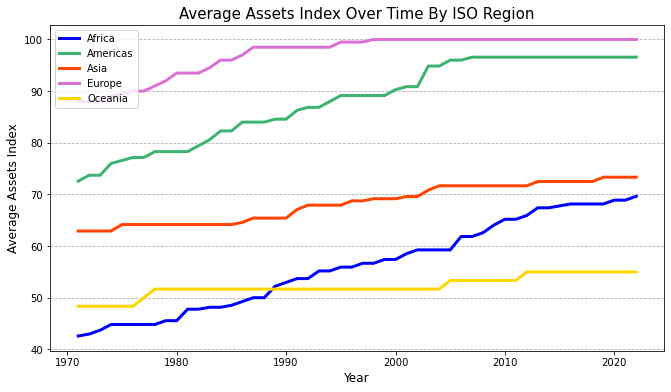

In [59]:
#Chart the data table
plt.rcParams['figure.figsize'] = (11, 6) #Set the parameters for the chart.
asstrendchart = asstrenddf.plot(kind = 'line', linewidth = 3.0, color=('blue', 'mediumseagreen', 'orangered', 'orchid', 'gold'))
plt.title('Average Assets Index Over Time By ISO Region', fontsize = 15) #Title the chart.
plt.xlabel('Year', fontsize = 12) #Label xaxis
plt.ylabel('Average Assets Index', fontsize = 12) #Label yaxis
plt.gca().legend(('Africa', 'Americas', 'Asia','Europe', 'Oceania')) #labels for legend
plt.grid(linestyle='--',axis='y')
plt.savefig('4_Avg_Assets_Trend_By_Region.jpg')
plt.show()

In [60]:
#Create a pivot for the Pension Index
pentrenddf = indexdf.pivot_table(index = 'year', columns = 'ISO_region', values = 'PENSION', aggfunc = ['mean'], fill_value=0)
pentrenddf.head()

mean                                         
ISO_region     Africa   Americas       Asia  Europe    Oceania
year                                                          
1971        46.296296  55.000000  39.062500  50.000  50.000000
1972        47.222222  56.428571  35.937500  45.625  50.000000
1973        47.222222  60.714286  36.458333  45.625  54.166667
1974        49.537037  62.142857  39.062500  45.625  58.333333
1975        51.851852  61.428571  40.625000  45.625  58.333333

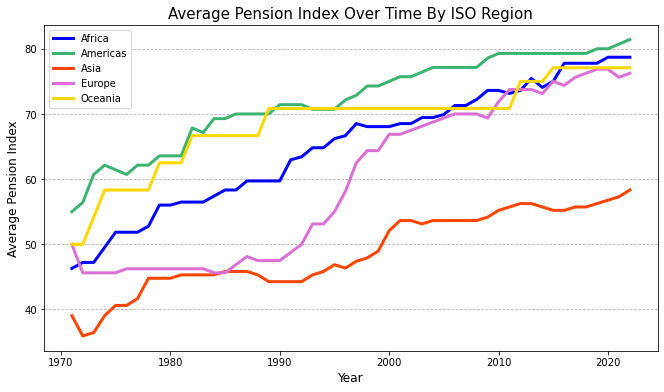

In [61]:
#Chart the data table
plt.rcParams['figure.figsize'] = (11, 6) #Set the parameters for the chart.
pentrendchart = pentrenddf.plot(kind = 'line', linewidth = 3.0, color=('blue', 'mediumseagreen', 'orangered', 'orchid', 'gold'))
plt.title('Average Pension Index Over Time By ISO Region', fontsize = 15) #Title the chart.
plt.xlabel('Year', fontsize = 12) #Label xaxis
plt.ylabel('Average Pension Index', fontsize = 12) #Label yaxis
plt.gca().legend(('Africa', 'Americas', 'Asia','Europe', 'Oceania')) #labels for legend
plt.grid(linestyle='--',axis='y')
plt.savefig('4_Avg_Pension_Trend_By_Region.jpg')
plt.show()

In [62]:
#Q5 What country has had the greatest change in index value?
#First create a table with 1971 values
startindexdf = indexdf[indexdf['year'] == 1971] #create new dataframe for just 1971 data
startindexdf = startindexdf[['country', 'ISO_code', 'ISO_region', 'income_group', 'year', 'INDEX']] #just putt out the columns that I need
startindexdf.head()

,country,ISO_code,ISO_region,income_group,year,INDEX
0,Afghanistan,AFG,Asia,Low income,1971,26.250
52,Albania,ALB,Europe,Upper middle income,1971,59.375
104,Algeria,DZA,Africa,Lower middle income,1971,30.000
156,Angola,AGO,Africa,Lower middle income,1971,30.625
208,Antigua and Barbuda,ATG,Americas,High income,1971,51.875


In [63]:
#Then create a table with the 2022 values
endindexdf = indexdf[indexdf['year'] == 2022]
endindexdf = endindexdf[['country', 'ISO_code', 'ISO_region', 'income_group', 'year', 'INDEX']]
endindexdf.head()

,country,ISO_code,ISO_region,income_group,year,INDEX
51,Afghanistan,AFG,Asia,Low income,2022,38.125
103,Albania,ALB,Europe,Upper middle income,2022,91.250
155,Algeria,DZA,Africa,Lower middle income,2022,57.500
207,Angola,AGO,Africa,Lower middle income,2022,79.375
259,Antigua and Barbuda,ATG,Americas,High income,2022,66.250


In [64]:
#Merge the two tables together
#Add the ISO region data to my main dataset
compindexdf = pd.merge(startindexdf, endindexdf, how='left', on=['ISO_code']) # left join and link on ISO_code
compindexdf.head()

,country_x,ISO_code,ISO_region_x,income_group_x,year_x,INDEX_x,country_y,ISO_region_y,income_group_y,year_y,INDEX_y
0,Afghanistan,AFG,Asia,Low income,1971,26.250,Afghanistan,Asia,Low income,2022,38.125
1,Albania,ALB,Europe,Upper middle income,1971,59.375,Albania,Europe,Upper middle income,2022,91.250
2,Algeria,DZA,Africa,Lower middle income,1971,30.000,Algeria,Africa,Lower middle income,2022,57.500
3,Angola,AGO,Africa,Lower middle income,1971,30.625,Angola,Africa,Lower middle income,2022,79.375
4,Antigua and Barbuda,ATG,Americas,High income,1971,51.875,Antigua and Barbuda,Americas,High income,2022,66.250


In [65]:
#Subtract the 1971 index from the 2022 index and put the value in a new field Index_Change
compindexdf['Index_Change'] = compindexdf['INDEX_y']-compindexdf['INDEX_x']
compindexdf.head()

,country_x,ISO_code,ISO_region_x,income_group_x,year_x,INDEX_x,country_y,ISO_region_y,income_group_y,year_y,INDEX_y,Index_Change
0,Afghanistan,AFG,Asia,Low income,1971,26.250,Afghanistan,Asia,Low income,2022,38.125,11.875
1,Albania,ALB,Europe,Upper middle income,1971,59.375,Albania,Europe,Upper middle income,2022,91.250,31.875
2,Algeria,DZA,Africa,Lower middle income,1971,30.000,Algeria,Africa,Lower middle income,2022,57.500,27.500
3,Angola,AGO,Africa,Lower middle income,1971,30.625,Angola,Africa,Lower middle income,2022,79.375,48.750
4,Antigua and Barbuda,ATG,Americas,High income,1971,51.875,Antigua and Barbuda,Americas,High income,2022,66.250,14.375


In [66]:
#Clean up the table by dropping unnessary columns and renaming fields
compindexdf = compindexdf[['country_x', 'ISO_code', 'ISO_region_x', 'income_group_x', 'INDEX_x', 'INDEX_y','Index_Change']]
#Clean up column headers
compindexdf.columns=['Country', 'ISO_code', 'ISO_region', 'income_group', '1971 INDEX', '2022 INDEX', 'Index_Change'] 
sortcompindexdf = compindexdf.sort_values(by=['Index_Change'], ascending=False) #sort table
sortcompindexdf.to_csv('5_Change_In_WBL_Index_by_Country.csv') #save as csv
sortcompindexdf.head()

,Country,ISO_code,ISO_region,income_group,1971 INDEX,2022 INDEX,Index_Change
156,Spain,ESP,Europe,High income,33.750,100.000,66.250
178,United Arab Emirates,ARE,Asia,High income,17.500,82.500,65.000
143,São Tomé and Príncipe,STP,Africa,Lower middle income,18.750,83.125,64.375
154,South Africa,ZAF,Africa,Upper middle income,25.625,88.125,62.500
15,Belgium,BEL,Europe,High income,38.125,100.000,61.875


In [67]:
#Find the greatest change in index value
#First find the greatest change
compindexdf['Index_Change'].max()

66.25

In [68]:
#Locate the record with that value and print the results
print('Country with the greatest change in index value: ')
print(compindexdf.loc[compindexdf['Index_Change'] == 66.25])

Country with the greatest change in index value: 
    Country ISO_code ISO_region income_group  1971 INDEX  2022 INDEX  \
156   Spain      ESP     Europe  High income       33.75       100.0   

     Index_Change  
156         66.25  


In [69]:
#Q6 What is the average length of paid maternity leave in 2022? Paternity leave? For each region?
#First look at most recent year data
parleave2022df = newdf[newdf['year'] == 2022]

In [70]:
#Then find the average for paid maternity leave and paid paternity leave grouped by ISO region
parleave2022df = parleave2022df.groupby('ISO_region')[['length_mat_leave', 'length_pat_leave']].mean()
parleave2022df.columns = ['Length of Maternity Leave', 'Length of Paternity Leave']
parleave2022df.to_csv('6_Avg_Mat_Pat_Leave_By_Region_2022.csv') #save as csv
parleave2022df

,Length of Maternity Leave,Length of Paternity Leave
ISO_region,,
Africa,90.092593,2.555556
Americas,93.371429,3.828571
Asia,98.687500,4.145833
Europe,157.200000,20.575000
Oceania,31.500000,1.833333


In [71]:
#I'm curious how this has changed over time
#First look at maternity leave
matleavedf = newdf.pivot_table(index = 'year', columns = 'ISO_region', values = 'length_mat_leave', aggfunc = ['mean'], fill_value = 0)
matleavedf.head()

mean                                      
ISO_region     Africa   Americas       Asia  Europe Oceania
year                                                       
1971        48.962963  51.028571  45.000000  87.575     7.0
1972        48.962963  51.028571  46.166667  89.650     7.0
1973        48.962963  56.628571  50.833333  93.950     7.0
1974        50.777778  57.828571  54.416667  90.800     7.0
1975        50.777778  60.428571  55.937500  91.500     7.0

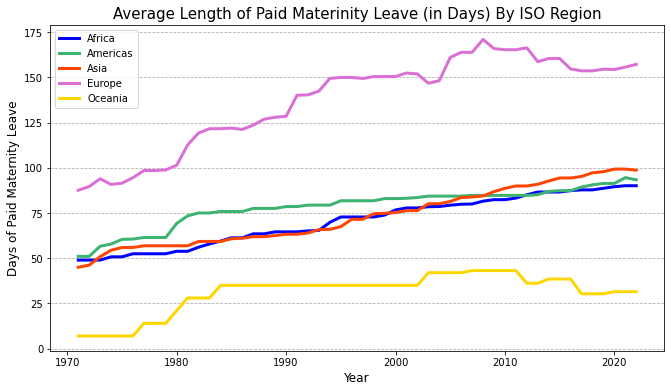

In [72]:
#Chart the data table
plt.rcParams['figure.figsize'] = (11, 6) #Set the parameters for the chart.
matleavechart = matleavedf.plot(kind = 'line', linewidth = 3.0, color=('blue', 'mediumseagreen', 'orangered', 'orchid', 'gold'))
plt.title('Average Length of Paid Materinity Leave (in Days) By ISO Region', fontsize = 15) #Title the chart.
plt.xlabel('Year', fontsize = 12) #Label xaxis
plt.ylabel('Days of Paid Maternity Leave', fontsize = 12) #Label yaxis
plt.gca().legend(('Africa', 'Americas', 'Asia','Europe', 'Oceania')) #labels for legend
plt.grid(linestyle='--',axis='y')
plt.savefig('6_Avg_Mat_Leave_By_Region.jpg') #save file
plt.show()

In [73]:
#Then look at paternity leave
patleavedf = newdf.pivot_table(index = 'year', columns = 'ISO_region', values = 'length_pat_leave', aggfunc = ['mean'], fill_value = 0)
patleavedf.head()

mean                              
ISO_region    Africa  Americas Asia Europe Oceania
year                                              
1971        0.370370  0.028571  0.0  0.175     0.0
1972        0.370370  0.028571  0.0  0.175     0.0
1973        0.444444  0.028571  0.0  0.175     0.0
1974        0.462963  0.028571  0.0  0.175     0.0
1975        0.481481  0.028571  0.0  0.175     0.0

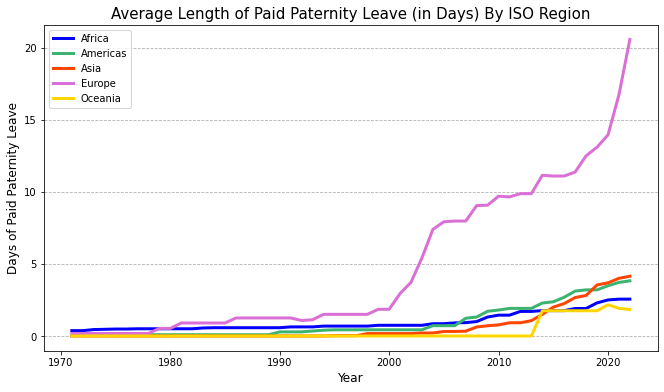

In [74]:
#Chart the data table
plt.rcParams['figure.figsize'] = (11, 6) #Set the parameters for the chart.
patleavechart = patleavedf.plot(kind = 'line', linewidth = 3.0, color=('blue', 'mediumseagreen', 'orangered', 'orchid', 'gold'))
plt.title('Average Length of Paid Paternity Leave (in Days) By ISO Region', fontsize = 15) #Title the chart.
plt.xlabel('Year', fontsize = 12) #Label xaxis
plt.ylabel('Days of Paid Paternity Leave', fontsize = 12) #Label yaxis
plt.gca().legend(('Africa', 'Americas', 'Asia','Europe', 'Oceania')) #labels for legend
plt.grid(linestyle='--',axis='y')
plt.savefig('6_Avg_Pat_Leave_By_Region.jpg') #save file
plt.show()

In [75]:
#Q7 How does the WBL Index relate to the percent of parliamentary seats held by women in a country?
#First bring in the parliamentary dataset
parldata = pd.read_csv(r'C:\Users\krist\programska\Project\\Viz5_August_Female_Political_Representation.csv')

#Rename the columns so the are easy to identify
parldata.columns = ['country', 'ISO_code', 'year', 'Percent_Women']
parldata.head()

,country,ISO_code,year,Percent_Women
0,Albania,ALB,1997,NaN
1,Albania,ALB,1998,NaN
2,Albania,ALB,1999,0.051613
3,Albania,ALB,2000,0.051613
4,Albania,ALB,2001,0.057143


In [76]:
#Check out datatypes
parldata.dtypes

country           object
ISO_code          object
year               int64
Percent_Women    float64
dtype: object

In [77]:
#There is some missing data, but it is the best we have
parldata.isnull().sum() #This function will give the sum of null values by field

country            0
ISO_code           0
year               0
Percent_Women    152
dtype: int64

In [78]:
#Omit rows that have blank data and save in new dataframe
parldata.dropna(subset = ['Percent_Women'], inplace = True)
parldata.head()

,country,ISO_code,year,Percent_Women
2,Albania,ALB,1999,0.051613
3,Albania,ALB,2000,0.051613
4,Albania,ALB,2001,0.057143
5,Albania,ALB,2002,0.057143
6,Albania,ALB,2003,0.057143


In [79]:
#Change the decimal value to a percent
parldata = parldata.assign(Percent_Women= parldata.Percent_Women.mul(100))
parldata.head()

,country,ISO_code,year,Percent_Women
2,Albania,ALB,1999,5.161290
3,Albania,ALB,2000,5.161290
4,Albania,ALB,2001,5.714286
5,Albania,ALB,2002,5.714286
6,Albania,ALB,2003,5.714286


In [80]:
#Add the two tables together
#First check my data types to be sure they will match
indexdf.dtypes

country           object
ISO_code          object
ISO_region        object
ISO_subregion     object
ISO_intermed      object
region            object
income_group      object
year               int64
INDEX            float64
MOBILITY           int64
WORKPLACE          int64
PAY                int64
MARRIAGE           int64
PARENTHOOD         int64
ENTRE              int64
ASSETS             int64
PENSION            int64
dtype: object

In [81]:
#Now add this table to our WBL Data
womenpoldf = pd.merge(parldata, indexdf, how='left', on=['ISO_code', 'year']) #left join and link on ISO code
sort_womenpoldf = womenpoldf.sort_values(by=['ISO_region'])
sort_womenpoldf.head()

,country_x,ISO_code,year,Percent_Women,country_y,ISO_region,ISO_subregion,ISO_intermed,region,income_group,INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTRE,ASSETS,PENSION
4792,Zimbabwe,ZWE,2019,31.851852,Zimbabwe,Africa,Sub-Saharan Africa,Eastern Africa,Sub-Saharan Africa,Lower middle income,86.875,100.0,100.0,75.0,80.0,40.0,100.0,100.0,100.0
1629,Guinea-Bissau,GNB,2019,13.725490,Guinea-Bissau,Africa,Sub-Saharan Africa,Western Africa,Sub-Saharan Africa,Low income,42.500,75.0,25.0,0.0,60.0,20.0,25.0,60.0,75.0
1628,Guinea-Bissau,GNB,2018,13.725490,Guinea-Bissau,Africa,Sub-Saharan Africa,Western Africa,Sub-Saharan Africa,Low income,42.500,75.0,25.0,0.0,60.0,20.0,25.0,60.0,75.0
1627,Guinea-Bissau,GNB,2017,13.725490,Guinea-Bissau,Africa,Sub-Saharan Africa,Western Africa,Sub-Saharan Africa,Low income,42.500,75.0,25.0,0.0,60.0,20.0,25.0,60.0,75.0
1626,Guinea-Bissau,GNB,2016,13.725490,Guinea-Bissau,Africa,Sub-Saharan Africa,Western Africa,Sub-Saharan Africa,Low income,42.500,75.0,25.0,0.0,60.0,20.0,25.0,60.0,75.0


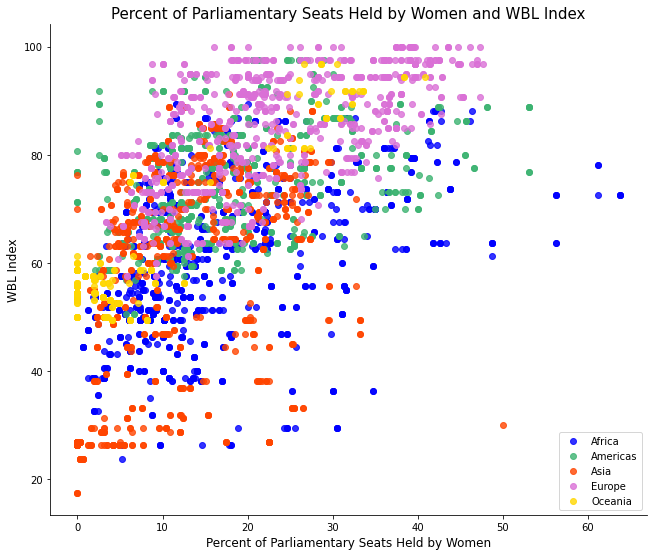

In [82]:
#Now create a scatter plot that compares Percent Women and INDEX and color by region
parlIndexchart = sns.lmplot(x='Percent_Women', y='INDEX', data = sort_womenpoldf, fit_reg = False, hue = 'ISO_region', legend=False, palette=('blue', 'mediumseagreen', 'orangered', 'orchid', 'gold')) #use seaborn to select data and set color to ISO region
parlIndexchart.fig.set_figwidth(10) #set the size of the chart
parlIndexchart.fig.set_figheight(8)
plt.legend(loc='lower right') #position legend
plt.title('Percent of Parliamentary Seats Held by Women and WBL Index', fontsize = 15) #title the chart
plt.xlabel('Percent of Parliamentary Seats Held by Women', fontsize = 12) #label xaxis
plt.ylabel('WBL Index', fontsize = 12) #label yaxis
plt.savefig('7_Percent_Parl_Seats_And_Index.jpg') #save as a jpg file
plt.show()

In [83]:
#Find the correlation among the columns using pearson method
Corr_PercentWomen = sort_womenpoldf.corr(method = 'pearson')
Corr_PercentWomen.to_csv('7_Corr_PercentWomen_Parl.csv') #save as csv
Corr_PercentWomen

,year,Percent_Women,INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTRE,ASSETS,PENSION
year,1.000000,0.368287,0.295359,0.035408,0.390460,0.211482,0.229554,0.173046,0.220694,0.066358,0.102348
Percent_Women,0.368287,1.000000,0.529423,0.226822,0.450452,0.378401,0.328776,0.379898,0.261807,0.386916,0.179290
INDEX,0.295359,0.529423,1.000000,0.629858,0.785874,0.633645,0.730975,0.640177,0.556881,0.723153,0.281190
MOBILITY,0.035408,0.226822,0.629858,1.000000,0.421767,0.288245,0.605197,0.313968,0.206257,0.462187,-0.087784
WORKPLACE,0.390460,0.450452,0.785874,0.421767,1.000000,0.469443,0.453422,0.463232,0.467971,0.486498,0.068685
PAY,0.211482,0.378401,0.633645,0.288245,0.469443,1.000000,0.349252,0.237423,0.243776,0.246894,0.229220
MARRIAGE,0.229554,0.328776,0.730975,0.605197,0.453422,0.349252,1.000000,0.271693,0.366281,0.611933,0.050498
PARENTHOOD,0.173046,0.379898,0.640177,0.313968,0.463232,0.237423,0.271693,1.000000,0.294420,0.429956,0.079858
ENTRE,0.220694,0.261807,0.556881,0.206257,0.467971,0.243776,0.366281,0.294420,1.000000,0.395554,0.036013
ASSETS,0.066358,0.386916,0.723153,0.462187,0.486498,0.246894,0.611933,0.429956,0.395554,1.000000,0.017082


In [84]:
#What does this parliamentary data look like over time by region?
#First group the data by region
parlRegiondf = womenpoldf.pivot_table(index = 'year', columns = 'ISO_region', values = 'Percent_Women', aggfunc = ['mean'], fill_value = 0)
parlRegiondf.head()

mean                                          
ISO_region     Africa   Americas      Asia     Europe   Oceania
year                                                           
1997         9.457083  11.171450  6.207629  16.209034  6.327963
1998         9.639711  12.526638  6.966322  17.164379  5.851613
1999         9.495876  11.950217  7.160434  17.761689  7.614738
2000        10.010945  12.298962  7.986992  18.716630  6.704873
2001        10.487406  12.756898  8.887109  18.636707  5.175872

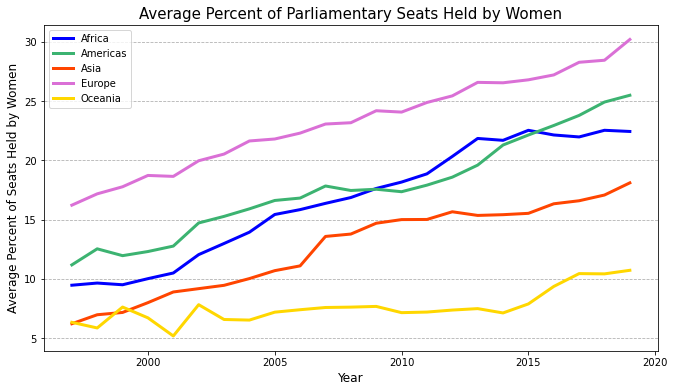

In [85]:
#Then chart the table
plt.rcParams['figure.figsize'] = (11, 6) #Set the parameters for the chart.
parlchart = parlRegiondf.plot(kind = 'line', linewidth = 3.0, color=('blue', 'mediumseagreen', 'orangered', 'orchid', 'gold'))
plt.title('Average Percent of Parliamentary Seats Held by Women', fontsize = 15) #Title the chart.
plt.xlabel('Year', fontsize = 12) #Label xaxis
plt.ylabel('Average Percent of Seats Held by Women', fontsize = 12) #Label yaxis
plt.gca().legend(('Africa', 'Americas', 'Asia','Europe', 'Oceania')) #labels for legend
plt.grid(linestyle='--',axis='y')
plt.savefig('7_Avg_Parl_Seats_By_Region_Over_Time.jpg') #save file
plt.show()

In [86]:
#How does this percent change over time compared to how WBL Index changes overtime?
#First group the data
parlIndexRegion = womenpoldf.groupby(['ISO_region', 'year']).agg({'Percent_Women':'mean', 'INDEX':'mean'}) #groupby both ISO region and year
parlIndexRegion.head()

Percent_Women      INDEX
ISO_region year                          
Africa     1997       9.457083  51.093750
           1998       9.639711  52.023810
           1999       9.495876  53.848684
           2000      10.010945  52.633929
           2001      10.487406  53.654891

In [87]:
#Convert the pivot table to dataframe
parlIndexRegiondf = parlIndexRegion.reset_index()
parlIndexRegiondf

,ISO_region,year,Percent_Women,INDEX
0,Africa,1997,9.457083,51.093750
1,Africa,1998,9.639711,52.023810
2,Africa,1999,9.495876,53.848684
3,Africa,2000,10.010945,52.633929
4,Africa,2001,10.487406,53.654891
...,...,...,...,...
110,Oceania,2015,7.880303,65.681818
111,Oceania,2016,9.353361,66.136364
112,Oceania,2017,10.436814,67.727273
113,Oceania,2018,10.414625,67.727273


In [88]:
#Pull off one region at a time because otherwise it is too many lines to read clearly
#Africa first
AfricaPI = parlIndexRegiondf[parlIndexRegiondf['ISO_region'] == 'Africa']

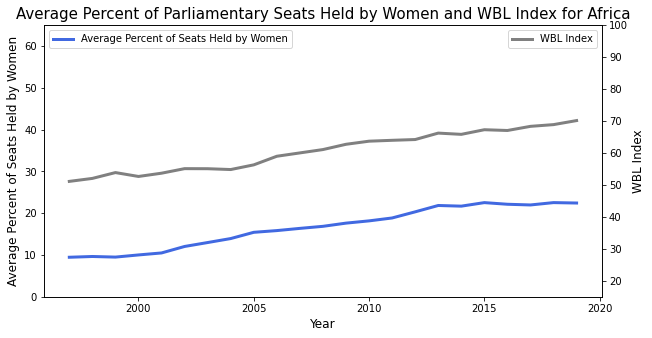

In [89]:
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Percent of Parliamentary Seats Held by Women and WBL Index for Africa', fontsize = 15) #set title
x.plot(AfricaPI['year'], AfricaPI['Percent_Women'], color='royalblue', linewidth = 3.0) #set first yaxis data
x2.plot(AfricaPI['year'], AfricaPI['INDEX'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Percent of Seats Held by Women', fontsize = 12) #set first yaxis label
x2.set_ylabel('WBL Index', fontsize = 12) #set second yaxis label
x.legend(['Average Percent of Seats Held by Women'], loc='upper left') #position legend
x2.legend(['WBL Index'], loc='upper right') #position legend
x.set_ylim([0,65]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('7_Avg_Parl_Index_Africa.jpg') #save as jpg file
plt.show()

In [90]:
#Americas
AmericasPI = parlIndexRegiondf[parlIndexRegiondf['ISO_region'] == 'Americas']

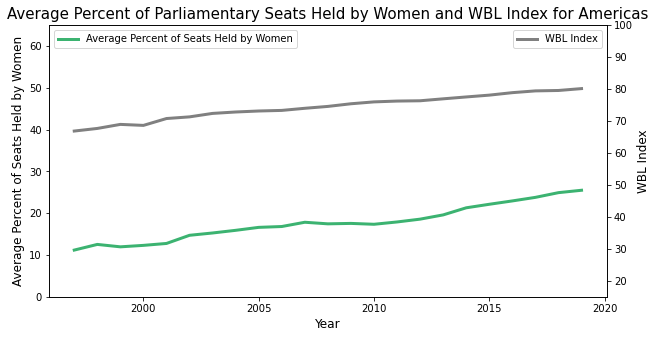

In [91]:
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Percent of Parliamentary Seats Held by Women and WBL Index for Americas', fontsize = 15) #set title
x.plot(AmericasPI['year'], AmericasPI['Percent_Women'], color='mediumseagreen', linewidth = 3.0) #set first yaxis data
x2.plot(AmericasPI['year'], AmericasPI['INDEX'], color='gray', linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Percent of Seats Held by Women', fontsize = 12) #set first yaxis label
x2.set_ylabel('WBL Index', fontsize = 12) #set second yaxis label
x.legend(['Average Percent of Seats Held by Women'], loc='upper left') #position legend
x2.legend(['WBL Index'], loc='upper right') #position legend
x.set_ylim([0,65]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('7_Avg_Parl_Index_Americas.jpg') #save as jpg file
plt.show()

In [92]:
#Asia
AsiaPI = parlIndexRegiondf[parlIndexRegiondf['ISO_region'] == 'Asia']

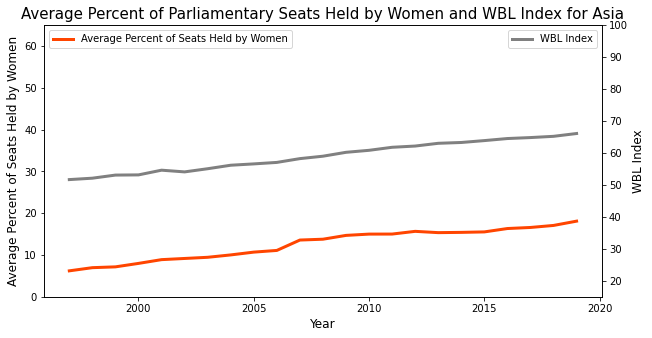

In [93]:
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Percent of Parliamentary Seats Held by Women and WBL Index for Asia', fontsize = 15) #set title
x.plot(AmericasPI['year'], AsiaPI['Percent_Women'], color='orangered', linewidth = 3.0) #set first yaxis data
x2.plot(AmericasPI['year'], AsiaPI['INDEX'], color='gray', linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Percent of Seats Held by Women', fontsize = 12) #set first yaxis label
x2.set_ylabel('WBL Index', fontsize = 12) #set second yaxis label
x.legend(['Average Percent of Seats Held by Women'], loc='upper left') #position legend
x2.legend(['WBL Index'], loc='upper right') #position legend
x.set_ylim([0,65]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('7_Avg_Parl_Index_Asia.jpg') #save as jpg file
plt.show()

In [94]:
#Europe
EuropePI = parlIndexRegiondf[parlIndexRegiondf['ISO_region'] == 'Europe']

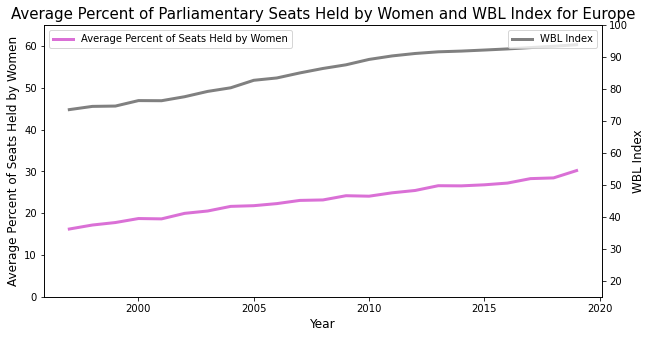

In [95]:
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Percent of Parliamentary Seats Held by Women and WBL Index for Europe', fontsize = 15) #set title
x.plot(EuropePI['year'], EuropePI['Percent_Women'], color='orchid',linewidth = 3.0) #set first yaxis data
x2.plot(EuropePI['year'], EuropePI['INDEX'], color='gray', linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Percent of Seats Held by Women', fontsize = 12) #set first yaxis label
x2.set_ylabel('WBL Index', fontsize = 12) #set second yaxis label
x.legend(['Average Percent of Seats Held by Women'], loc='upper left') #position legend
x2.legend(['WBL Index'], loc='upper right') #position legend
x.set_ylim([0,65]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('7_Avg_Parl_Index_Europe.jpg') #save as jpg file
plt.show()

In [96]:
#Oceania
OceaniaPI = parlIndexRegiondf[parlIndexRegiondf['ISO_region'] == 'Oceania']

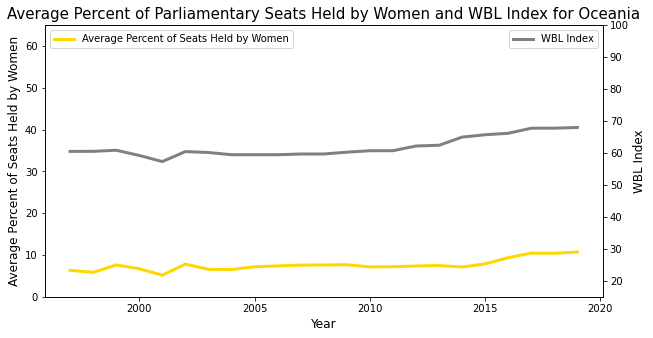

In [97]:
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Percent of Parliamentary Seats Held by Women and WBL Index for Oceania', fontsize = 15) #set title
x.plot(OceaniaPI['year'], OceaniaPI['Percent_Women'], color='gold', linewidth = 3.0) #set first yaxis data
x2.plot(OceaniaPI['year'], OceaniaPI['INDEX'], color='gray', linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Percent of Seats Held by Women', fontsize = 12) #set first yaxis label
x2.set_ylabel('WBL Index', fontsize = 12) #set second yaxis label
x.legend(['Average Percent of Seats Held by Women'], loc='upper left') #position legend
x2.legend(['WBL Index'], loc='upper right') #position legend
x.set_ylim([0,65]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('7_Avg_Parl_Index_Oceania.jpg') #save as jpg file
plt.show()

In [98]:
#Q8 How does the WBL Index relate to the ratio of female to male labor force participation rate (%)?
#First bring in the female labor force participation data
ratiodata = pd.read_csv(r'C:\\Users\\krist\\programska\\Project\\API_SL.TLF.CACT.FM.ZS_DS2_en_csv_v2_4030007.csv', skiprows =4 ) #skip top 4 rows padding the dataset
#read necessary columns into dataframe
ratiodf = pd.DataFrame(ratiodata, columns = ['Country Code', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
ratiodf.head()                     

,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFE,82.734761,82.805479,82.976656,83.200929,83.468317,83.905799,84.208024,84.504034,84.806172,...,85.995434,86.070017,86.100643,86.250666,86.416972,86.804230,87.178417,87.546025,86.477580,86.814148
2,AFG,19.604805,19.713381,19.803306,19.844606,19.884711,20.000789,19.802995,19.608718,19.463456,...,20.778592,22.217814,23.748613,25.375297,27.103841,28.936175,29.473918,30.009880,24.685878,22.322784
3,AFW,83.409458,83.391400,83.372727,83.466987,83.619746,83.820468,83.835258,83.919071,84.051219,...,83.579165,83.365110,82.988812,82.737007,82.306408,81.904111,81.601042,81.346123,80.852514,80.821323
4,AGO,95.101646,94.977761,94.917202,94.914941,94.968575,95.076967,95.057670,95.105288,95.210218,...,93.633796,93.623170,93.656772,93.738184,93.805355,93.926483,94.101920,94.330920,93.426228,93.546310


In [99]:
#rename some columns so they work with the other data tables
ratiodf.columns = ['ISO_code', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
ratiodf.head()

,ISO_code,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFE,82.734761,82.805479,82.976656,83.200929,83.468317,83.905799,84.208024,84.504034,84.806172,...,85.995434,86.070017,86.100643,86.250666,86.416972,86.804230,87.178417,87.546025,86.477580,86.814148
2,AFG,19.604805,19.713381,19.803306,19.844606,19.884711,20.000789,19.802995,19.608718,19.463456,...,20.778592,22.217814,23.748613,25.375297,27.103841,28.936175,29.473918,30.009880,24.685878,22.322784
3,AFW,83.409458,83.391400,83.372727,83.466987,83.619746,83.820468,83.835258,83.919071,84.051219,...,83.579165,83.365110,82.988812,82.737007,82.306408,81.904111,81.601042,81.346123,80.852514,80.821323
4,AGO,95.101646,94.977761,94.917202,94.914941,94.968575,95.076967,95.057670,95.105288,95.210218,...,93.633796,93.623170,93.656772,93.738184,93.805355,93.926483,94.101920,94.330920,93.426228,93.546310


In [100]:
#I want to convert to a tall dataframe so it is easier to merge with the WBL data
ratiodf = ratiodf.set_index('ISO_code') #make ISO code my index
tallratiodf = ratiodf.stack() #stack to make tall
tallratiodf.head()

ISO_code      
AFE       1990    82.734761
          1991    82.805479
          1992    82.976656
          1993    83.200929
          1994    83.468317
dtype: float64

In [101]:
#reset index again so it fills in on all the rows
tallratiodf2 = tallratiodf.reset_index()
#rename the columns
tallratiodf2.columns=['ISO_code', 'year', 'Ratio Women Labor']
tallratiodf2.head()

,ISO_code,year,Ratio Women Labor
0,AFE,1990,82.734761
1,AFE,1991,82.805479
2,AFE,1992,82.976656
3,AFE,1993,83.200929
4,AFE,1994,83.468317


In [102]:
#Check out datatypes
tallratiodf2.dtypes

ISO_code              object
year                  object
Ratio Women Labor    float64
dtype: object

In [103]:
#year needs to be int
tallratiodf3 = tallratiodf2.astype({'year':'int64', 'Ratio Women Labor':'float'})
tallratiodf3.dtypes

ISO_code              object
year                   int64
Ratio Women Labor    float64
dtype: object

In [104]:
#Now add this table to our WBL Data
ratioindexdf = pd.merge(tallratiodf3, indexdf, how='left', on=['ISO_code', 'year']) #left join and link on ISO code
ratioindexdf.head()

,ISO_code,year,Ratio Women Labor,country,ISO_region,ISO_subregion,ISO_intermed,region,income_group,INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTRE,ASSETS,PENSION
0,AFE,1990,82.734761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFE,1991,82.805479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFE,1992,82.976656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFE,1993,83.200929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFE,1994,83.468317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
#Omit rows that have blank data and save in new dataframe. Some countries just don't match between the two data tables like Aruba
ratioindexdf.dropna(subset = ['country'], inplace = True)
ratioindexdf = ratioindexdf.sort_values(by=['ISO_region']) #sort so that the charts have consistent colors
ratioindexdf.head()

,ISO_code,year,Ratio Women Labor,country,ISO_region,ISO_subregion,ISO_intermed,region,income_group,INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTRE,ASSETS,PENSION
7519,ZWE,2021,89.177246,Zimbabwe,Africa,Sub-Saharan Africa,Eastern Africa,Sub-Saharan Africa,Lower middle income,86.875,100.0,100.0,75.0,80.0,40.0,100.0,100.0,100.0
6028,SOM,2002,42.638342,Somalia,Africa,Sub-Saharan Africa,Eastern Africa,Sub-Saharan Africa,Low income,46.875,75.0,50.0,50.0,20.0,40.0,75.0,40.0,25.0
6027,SOM,2001,42.926688,Somalia,Africa,Sub-Saharan Africa,Eastern Africa,Sub-Saharan Africa,Low income,46.875,75.0,50.0,50.0,20.0,40.0,75.0,40.0,25.0
6026,SOM,2000,43.452856,Somalia,Africa,Sub-Saharan Africa,Eastern Africa,Sub-Saharan Africa,Low income,46.875,75.0,50.0,50.0,20.0,40.0,75.0,40.0,25.0
6025,SOM,1999,43.834577,Somalia,Africa,Sub-Saharan Africa,Eastern Africa,Sub-Saharan Africa,Low income,46.875,75.0,50.0,50.0,20.0,40.0,75.0,40.0,25.0


In [106]:
#What does this ratio women to men in workplace data look like over time by region?
#First group the data by region
ratiodf2 = ratioindexdf.pivot_table(index = 'year', columns = 'ISO_region', values = 'Ratio Women Labor', aggfunc = ['mean'], fill_value = 0)
ratiodf2.head()

mean                                            
ISO_region     Africa   Americas       Asia     Europe    Oceania
year                                                             
1990        71.511156  57.191492  54.316345  70.636120  71.064443
1991        71.588618  57.610922  54.478657  71.081399  71.570452
1992        71.731239  58.252185  54.638220  71.625919  71.967598
1993        71.898081  58.831980  54.808703  71.889149  72.316157
1994        72.180330  59.367748  55.416102  72.068504  72.971636

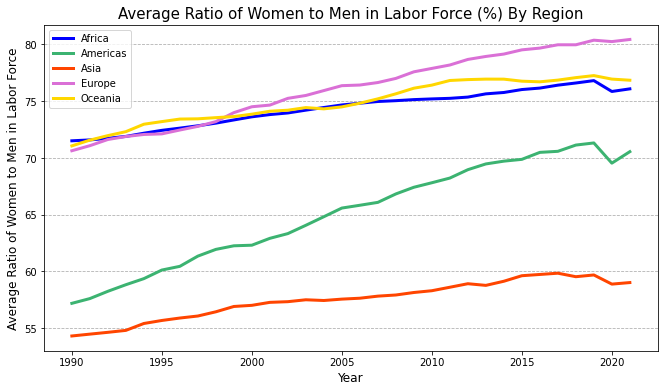

In [107]:
#Then chart the table
plt.rcParams['figure.figsize'] = (11, 6) #Set the parameters for the chart.
ratiodf2chart = ratiodf2.plot(kind = 'line', linewidth = 3.0, color = ('blue', 'mediumseagreen', 'orangered', 'orchid', 'gold'))
plt.title('Average Ratio of Women to Men in Labor Force (%) By Region', fontsize = 15) #Title the chart.
plt.xlabel('Year', fontsize = 12) #Label xaxis
plt.ylabel('Average Ratio of Women to Men in Labor Force', fontsize = 12) #Label yaxis
plt.gca().legend(('Africa', 'Americas', 'Asia','Europe', 'Oceania')) #labels for legend
plt.grid(linestyle='--',axis='y')
plt.savefig('8_Avg_Ratio_Women_Labor_By_Region.jpg') #save file
plt.show()

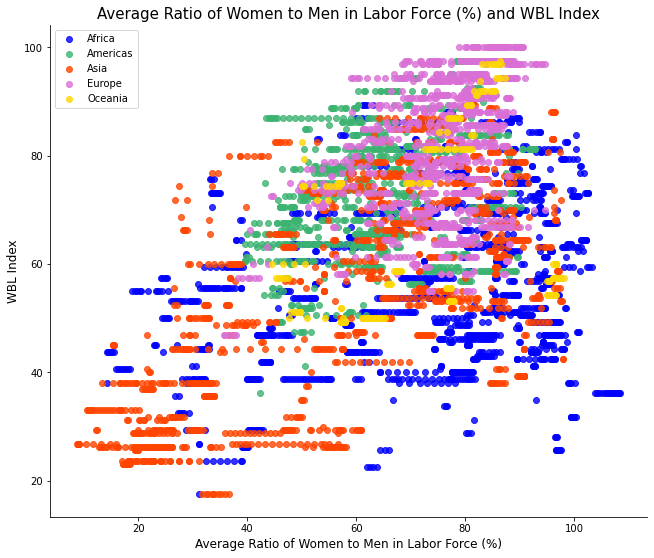

In [108]:
#Now create a scatter plot that compares Ratio of Women to Men in Labor Force and INDEX and color by region
ratioIndexchart = sns.lmplot(x='Ratio Women Labor', y='INDEX', data = ratioindexdf, fit_reg = False, hue = 'ISO_region', legend=False, palette=('blue', 'mediumseagreen', 'orangered', 'orchid', 'gold')) #use seaborn to select data and set color to ISO region
ratioIndexchart.fig.set_figwidth(10) #set the size of the chart
ratioIndexchart.fig.set_figheight(8)
plt.legend(loc='upper left') #position legend
plt.title('Average Ratio of Women to Men in Labor Force (%) and WBL Index', fontsize = 15) #title the chart
plt.xlabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #label xaxis
plt.ylabel('WBL Index', fontsize = 12) #label yaxis
plt.show()

In [109]:
#It is a little smudgy looking. I wonder if just looking at one year at a time would be helpful.
ratioindexdf2021 = ratioindexdf[ratioindexdf['year'] == 2021] #Just pull out year 2021 data

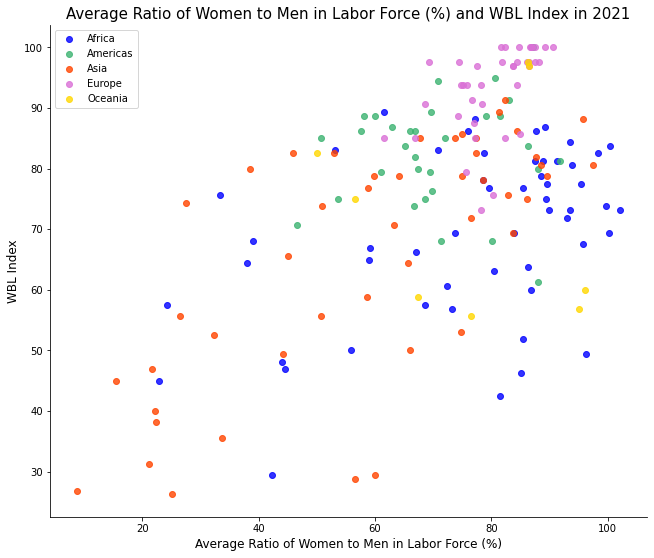

In [110]:
#Recreate the scatter plot for just 2021
ratioIndexchart = sns.lmplot(x='Ratio Women Labor', y='INDEX', data = ratioindexdf2021, fit_reg = False, hue = 'ISO_region', legend=False, palette=('blue', 'mediumseagreen', 'orangered', 'orchid', 'gold')) #use seaborn to select data and set color to ISO region
ratioIndexchart.fig.set_figwidth(10) #set the size of the chart
ratioIndexchart.fig.set_figheight(8)
plt.legend(loc='upper left') #position legend
plt.title('Average Ratio of Women to Men in Labor Force (%) and WBL Index in 2021', fontsize = 15) #title the chart
plt.xlabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #label xaxis
plt.ylabel('WBL Index', fontsize = 12) #label yaxis
plt.savefig('8_Ratio_Women_Labor_And_Index_2021.jpg') #save as a jpg file
plt.show()

In [111]:
#look at the relationship of these two variables over time by region
#First group the data
ratioIndexRegion = ratioindexdf.groupby(['ISO_region', 'year']).agg({'Ratio Women Labor':'mean', 'INDEX':'mean'}) #groupby both ISO region and year
ratioIndexRegion.head()

Ratio Women Labor      INDEX
ISO_region year                              
Africa     1990          71.511156  44.422170
           1991          71.588618  45.306604
           1992          71.731239  45.518868
           1993          71.898081  46.250000
           1994          72.180330  47.216981

In [112]:
#Convert the pivot table to dataframe
ratioIndexRegiondf = ratioIndexRegion.reset_index()
ratioIndexRegiondf

,ISO_region,year,Ratio Women Labor,INDEX
0,Africa,1990,71.511156,44.422170
1,Africa,1991,71.588618,45.306604
2,Africa,1992,71.731239,45.518868
3,Africa,1993,71.898081,46.250000
4,Africa,1994,72.180330,47.216981
...,...,...,...,...
155,Oceania,2017,76.858203,71.484375
156,Oceania,2018,77.077059,71.484375
157,Oceania,2019,77.256363,71.484375
158,Oceania,2020,76.947588,72.109375


In [113]:
#Now split out Africa first
AfricaRI = ratioIndexRegiondf[ratioIndexRegiondf['ISO_region'] == 'Africa']
AfricaRI.head()

,ISO_region,year,Ratio Women Labor,INDEX
0,Africa,1990,71.511156,44.422170
1,Africa,1991,71.588618,45.306604
2,Africa,1992,71.731239,45.518868
3,Africa,1993,71.898081,46.250000
4,Africa,1994,72.180330,47.216981


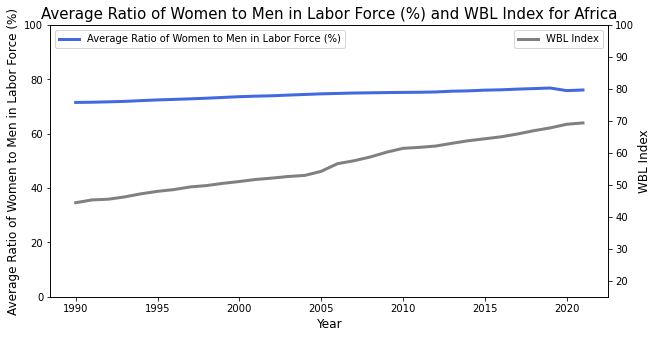

In [114]:
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Ratio of Women to Men in Labor Force (%) and WBL Index for Africa', fontsize = 15) #set title
x.plot(AfricaRI['year'], AfricaRI['Ratio Women Labor'], color='royalblue', linewidth = 3.0) #set first yaxis data
x2.plot(AfricaRI['year'], AfricaRI['INDEX'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #set first yaxis label
x2.set_ylabel('WBL Index', fontsize = 12) #set second yaxis label
x.legend(['Average Ratio of Women to Men in Labor Force (%)'], loc='upper left') #position legend
x2.legend(['WBL Index'], loc='upper right') #position legend
x.set_ylim([0,100]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('8_Avg_Ratio_Women_Labor_Index_Africa.jpg') #save as jpg file
plt.show()

In [115]:
#Then Americas
AmericasRI = ratioIndexRegiondf[ratioIndexRegiondf['ISO_region'] == 'Americas']
AmericasRI.head()

,ISO_region,year,Ratio Women Labor,INDEX
32,Americas,1990,57.191492,59.798387
33,Americas,1991,57.610922,61.653226
34,Americas,1992,58.252185,62.197581
35,Americas,1993,58.831980,63.024194
36,Americas,1994,59.367748,63.911290


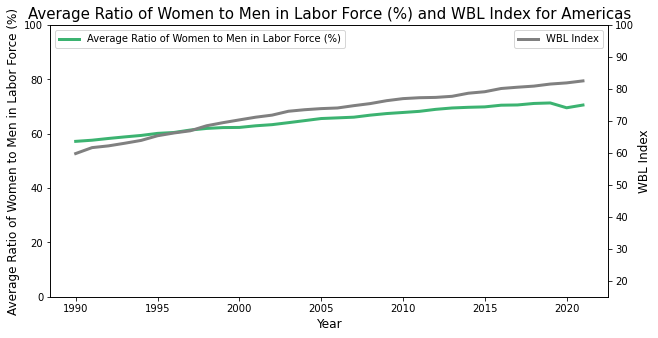

In [116]:
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Ratio of Women to Men in Labor Force (%) and WBL Index for Americas', fontsize = 15) #set title
x.plot(AmericasRI['year'], AmericasRI['Ratio Women Labor'], color='mediumseagreen', linewidth = 3.0) #set first yaxis data
x2.plot(AmericasRI['year'], AmericasRI['INDEX'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #set first yaxis label
x2.set_ylabel('WBL Index', fontsize = 12) #set second yaxis label
x.legend(['Average Ratio of Women to Men in Labor Force (%)'], loc='upper left') #position legend
x2.legend(['WBL Index'], loc='upper right') #position legend
x.set_ylim([0,100]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('8_Avg_Ratio_Women_Labor_Index_Americas.jpg') #save as jpg file
plt.show()

In [117]:
#Asia
AsiaRI = ratioIndexRegiondf[ratioIndexRegiondf['ISO_region'] == 'Asia']
AsiaRI.head()

,ISO_region,year,Ratio Women Labor,INDEX
64,Asia,1990,54.316345,45.518617
65,Asia,1991,54.478657,45.864362
66,Asia,1992,54.638220,46.382979
67,Asia,1993,54.808703,46.582447
68,Asia,1994,55.416102,46.648936


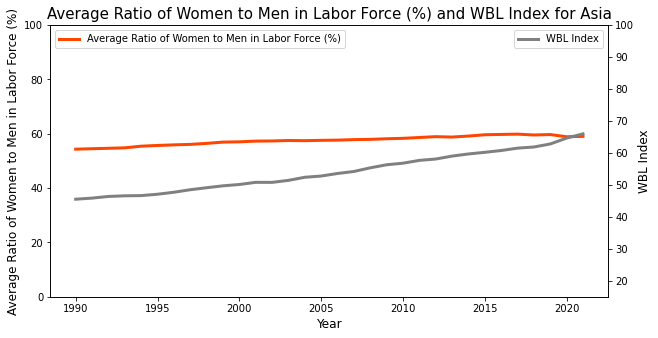

In [118]:
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Ratio of Women to Men in Labor Force (%) and WBL Index for Asia', fontsize = 15) #set title
x.plot(AsiaRI['year'], AsiaRI['Ratio Women Labor'], color='orangered', linewidth = 3.0) #set first yaxis data
x2.plot(AsiaRI['year'], AsiaRI['INDEX'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #set first yaxis label
x2.set_ylabel('WBL Index', fontsize = 12) #set second yaxis label
x.legend(['Average Ratio of Women to Men in Labor Force (%)'], loc='upper left') #position legend
x2.legend(['WBL Index'], loc='upper right') #position legend
x.set_ylim([0,100]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('8_Avg_Ratio_Women_Labor_Index_Asia.jpg') #save as jpg file
plt.show()

In [119]:
#Europe
EuropeRI = ratioIndexRegiondf[ratioIndexRegiondf['ISO_region'] == 'Europe']
EuropeRI.head()

,ISO_region,year,Ratio Women Labor,INDEX
96,Europe,1990,70.636120,66.762821
97,Europe,1991,71.081399,67.115385
98,Europe,1992,71.625919,67.692308
99,Europe,1993,71.889149,68.365385
100,Europe,1994,72.068504,69.022436


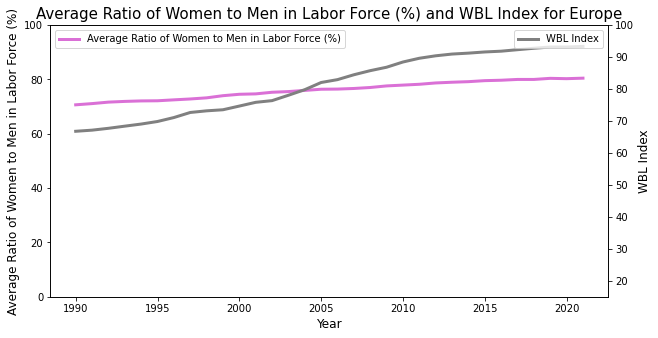

In [120]:
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Ratio of Women to Men in Labor Force (%) and WBL Index for Europe', fontsize = 15) #set title
x.plot(EuropeRI['year'], EuropeRI['Ratio Women Labor'], color='orchid', linewidth = 3.0) #set first yaxis data
x2.plot(EuropeRI['year'], EuropeRI['INDEX'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #set first yaxis label
x2.set_ylabel('WBL Index', fontsize = 12) #set second yaxis label
x.legend(['Average Ratio of Women to Men in Labor Force (%)'], loc='upper left') #position legend
x2.legend(['WBL Index'], loc='upper right') #position legend
x.set_ylim([0,100]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('8_Avg_Ratio_Women_Labor_Index_Europe.jpg') #save as jpg file
plt.show()

In [121]:
#Oceania
OceaniaRI = ratioIndexRegiondf[ratioIndexRegiondf['ISO_region'] == 'Oceania']
OceaniaRI.head()

,ISO_region,year,Ratio Women Labor,INDEX
128,Oceania,1990,71.064443,58.984375
129,Oceania,1991,71.570452,58.984375
130,Oceania,1992,71.967598,58.984375
131,Oceania,1993,72.316157,58.984375
132,Oceania,1994,72.971636,58.984375


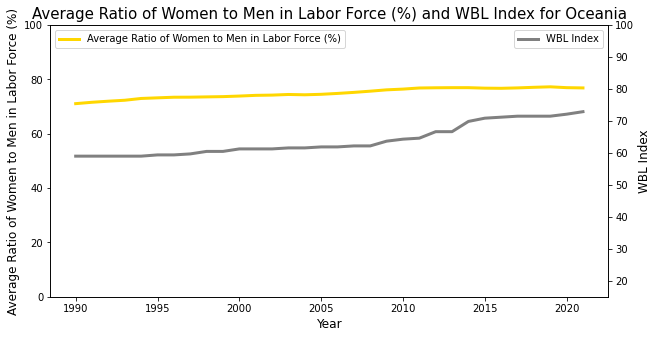

In [122]:
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Ratio of Women to Men in Labor Force (%) and WBL Index for Oceania', fontsize = 15) #set title
x.plot(OceaniaRI['year'], OceaniaRI['Ratio Women Labor'], color='gold', linewidth = 3.0) #set first yaxis data
x2.plot(OceaniaRI['year'], OceaniaRI['INDEX'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #set first yaxis label
x2.set_ylabel('WBL Index', fontsize = 12) #set second yaxis label
x.legend(['Average Ratio of Women to Men in Labor Force (%)'], loc='upper left') #position legend
x2.legend(['WBL Index'], loc='upper right') #position legend
x.set_ylim([0,100]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('8_Avg_Ratio_Women_Labor_Index_Oceania.jpg') #save as jpg file
plt.show()

In [123]:
#Q9 How does the ratio of women to men in the labor force relate to the WORKPLACE subindex? To the PAY subindex? To the PARENTHOOD subindex?
#look at the relationship of these two variables over time by region
#First group the data
ratioWorkRegion = ratioindexdf.groupby(['ISO_region', 'year']).agg({'Ratio Women Labor':'mean', 'WORKPLACE':'mean'}) #groupby both ISO region and year
ratioWorkRegion.head()

Ratio Women Labor  WORKPLACE
ISO_region year                              
Africa     1990          71.511156  16.509434
           1991          71.588618  17.452830
           1992          71.731239  17.452830
           1993          71.898081  17.924528
           1994          72.180330  20.754717

In [124]:
#Convert the pivot table to dataframe
ratioWorkRegiondf = ratioWorkRegion.reset_index()
ratioWorkRegiondf

,ISO_region,year,Ratio Women Labor,WORKPLACE
0,Africa,1990,71.511156,16.509434
1,Africa,1991,71.588618,17.452830
2,Africa,1992,71.731239,17.452830
3,Africa,1993,71.898081,17.924528
4,Africa,1994,72.180330,20.754717
...,...,...,...,...
155,Oceania,2017,76.858203,65.625000
156,Oceania,2018,77.077059,65.625000
157,Oceania,2019,77.256363,65.625000
158,Oceania,2020,76.947588,65.625000


In [125]:
#Now split out Africa first
AfricaRW = ratioWorkRegiondf[ratioWorkRegiondf['ISO_region'] == 'Africa']
AfricaRW.head()

,ISO_region,year,Ratio Women Labor,WORKPLACE
0,Africa,1990,71.511156,16.509434
1,Africa,1991,71.588618,17.452830
2,Africa,1992,71.731239,17.452830
3,Africa,1993,71.898081,17.924528
4,Africa,1994,72.180330,20.754717


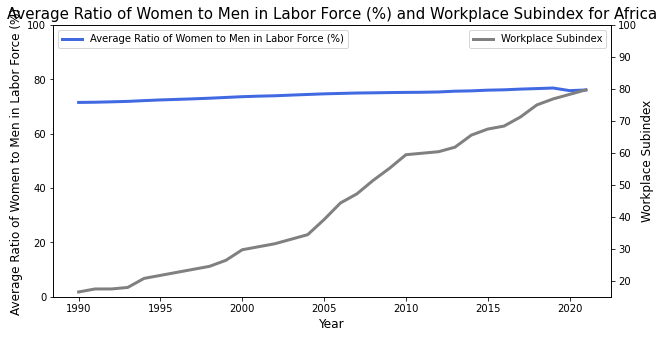

In [126]:
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Ratio of Women to Men in Labor Force (%) and Workplace Subindex for Africa', fontsize = 15) #set title
x.plot(AfricaRW['year'], AfricaRW['Ratio Women Labor'], color='royalblue', linewidth = 3.0) #set first yaxis data
x2.plot(AfricaRW['year'], AfricaRW['WORKPLACE'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #set first yaxis label
x2.set_ylabel('Workplace Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Ratio of Women to Men in Labor Force (%)'], loc='upper left') #position legend
x2.legend(['Workplace Subindex'], loc='upper right') #position legend
x.set_ylim([0,100]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('9_Avg_Ratio_Women_Labor_WorkSubindex_Africa.jpg') #save as jpg file
plt.show()

In [127]:
#Americas
AmericasRW = ratioWorkRegiondf[ratioWorkRegiondf['ISO_region'] == 'Americas']
AmericasRW.head()

,ISO_region,year,Ratio Women Labor,WORKPLACE
32,Americas,1990,57.191492,29.032258
33,Americas,1991,57.610922,32.258065
34,Americas,1992,58.252185,34.677419
35,Americas,1993,58.831980,37.903226
36,Americas,1994,59.367748,39.516129


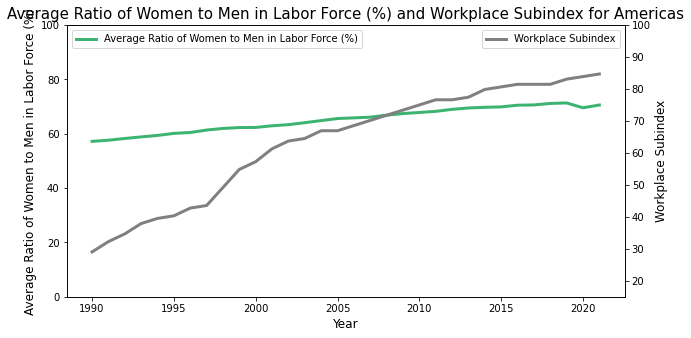

In [128]:
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Ratio of Women to Men in Labor Force (%) and Workplace Subindex for Americas', fontsize = 15) #set title
x.plot(AmericasRW['year'], AmericasRW['Ratio Women Labor'], color='mediumseagreen', linewidth = 3.0) #set first yaxis data
x2.plot(AmericasRW['year'], AmericasRW['WORKPLACE'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #set first yaxis label
x2.set_ylabel('Workplace Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Ratio of Women to Men in Labor Force (%)'], loc='upper left') #position legend
x2.legend(['Workplace Subindex'], loc='upper right') #position legend
x.set_ylim([0,100]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('9_Avg_Ratio_Women_Labor_WorkSubindex_Americas.jpg') #save as jpg file
plt.show()

In [129]:
#Asia
AsiaRW = ratioWorkRegiondf[ratioWorkRegiondf['ISO_region'] == 'Asia']
AsiaRW.head()

,ISO_region,year,Ratio Women Labor,WORKPLACE
64,Asia,1990,54.316345,22.872340
65,Asia,1991,54.478657,22.872340
66,Asia,1992,54.638220,24.468085
67,Asia,1993,54.808703,24.468085
68,Asia,1994,55.416102,24.468085


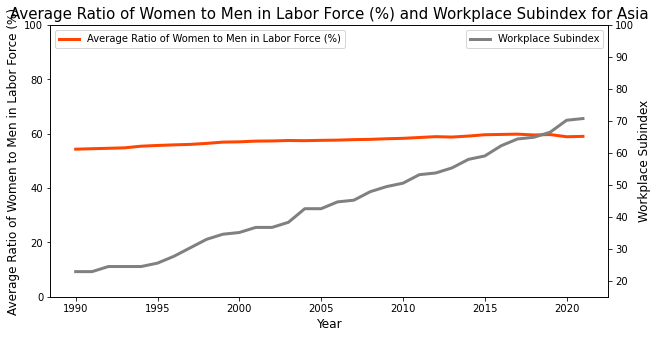

In [130]:
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Ratio of Women to Men in Labor Force (%) and Workplace Subindex for Asia', fontsize = 15) #set title
x.plot(AsiaRW['year'], AsiaRW['Ratio Women Labor'], color='orangered', linewidth = 3.0) #set first yaxis data
x2.plot(AsiaRW['year'], AsiaRW['WORKPLACE'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #set first yaxis label
x2.set_ylabel('Workplace Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Ratio of Women to Men in Labor Force (%)'], loc='upper left') #position legend
x2.legend(['Workplace Subindex'], loc='upper right') #position legend
x.set_ylim([0,100]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('9_Avg_Ratio_Women_Labor_WorkSubindex_Asia.jpg') #save as jpg file
plt.show()

In [131]:
#Europe
EuropeRW = ratioWorkRegiondf[ratioWorkRegiondf['ISO_region'] == 'Europe']
EuropeRW.head()

,ISO_region,year,Ratio Women Labor,WORKPLACE
96,Europe,1990,70.636120,37.179487
97,Europe,1991,71.081399,37.179487
98,Europe,1992,71.625919,37.820513
99,Europe,1993,71.889149,37.820513
100,Europe,1994,72.068504,40.384615


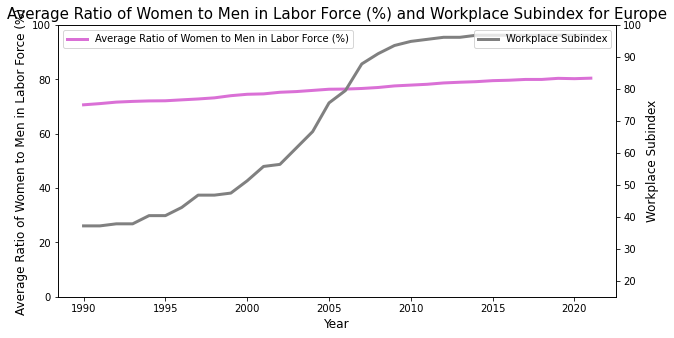

In [132]:
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Ratio of Women to Men in Labor Force (%) and Workplace Subindex for Europe', fontsize = 15) #set title
x.plot(EuropeRW['year'], EuropeRW['Ratio Women Labor'], color='orchid', linewidth = 3.0) #set first yaxis data
x2.plot(EuropeRW['year'], EuropeRW['WORKPLACE'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #set first yaxis label
x2.set_ylabel('Workplace Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Ratio of Women to Men in Labor Force (%)'], loc='upper left') #position legend
x2.legend(['Workplace Subindex'], loc='upper right') #position legend
x.set_ylim([0,100]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('9_Avg_Ratio_Women_Labor_WorkSubindex_Europe.jpg') #save as jpg file
plt.show()

In [133]:
#Oceania
OceaniaRW = ratioWorkRegiondf[ratioWorkRegiondf['ISO_region'] == 'Oceania']
OceaniaRW.head()

,ISO_region,year,Ratio Women Labor,WORKPLACE
128,Oceania,1990,71.064443,43.75
129,Oceania,1991,71.570452,43.75
130,Oceania,1992,71.967598,43.75
131,Oceania,1993,72.316157,43.75
132,Oceania,1994,72.971636,43.75


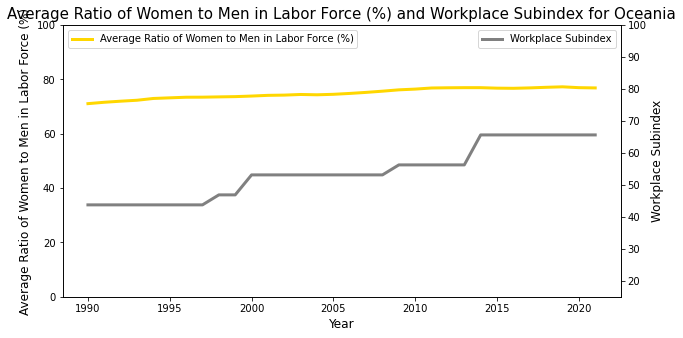

In [134]:
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Ratio of Women to Men in Labor Force (%) and Workplace Subindex for Oceania', fontsize = 15) #set title
x.plot(OceaniaRW['year'], OceaniaRW['Ratio Women Labor'], color='gold', linewidth = 3.0) #set first yaxis data
x2.plot(OceaniaRW['year'], OceaniaRW['WORKPLACE'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #set first yaxis label
x2.set_ylabel('Workplace Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Ratio of Women to Men in Labor Force (%)'], loc='upper left') #position legend
x2.legend(['Workplace Subindex'], loc='upper right') #position legend
x.set_ylim([0,100]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('9_Avg_Ratio_Women_Labor_WorkSubindex_Oceania.jpg') #save as jpg file
plt.show()

In [135]:
#I'm curious of the Pay subratio is any more closly aligned with the ratio of women to men in labor force
#look at the relationship of these two variables over time by region
#First group the data
ratioPayRegion = ratioindexdf.groupby(['ISO_region', 'year']).agg({'Ratio Women Labor':'mean', 'PAY':'mean'}) #groupby both ISO region and year
#Convert the pivot table to dataframe
ratioPayRegiondf = ratioPayRegion.reset_index()
ratioPayRegiondf.head()

,ISO_region,year,Ratio Women Labor,PAY
0,Africa,1990,71.511156,33.962264
1,Africa,1991,71.588618,34.433962
2,Africa,1992,71.731239,34.905660
3,Africa,1993,71.898081,34.905660
4,Africa,1994,72.180330,36.320755


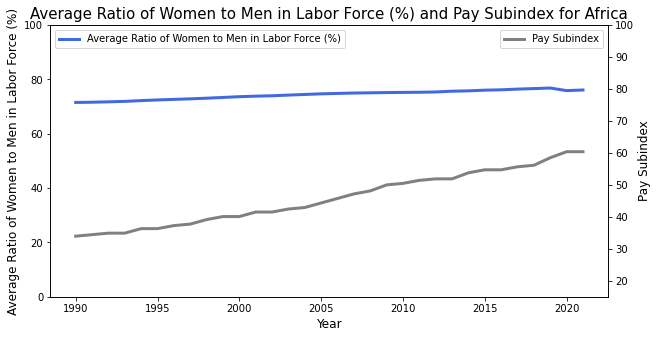

In [136]:
#Now split out Africa first
AfricaRP = ratioPayRegiondf[ratioWorkRegiondf['ISO_region'] == 'Africa']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Ratio of Women to Men in Labor Force (%) and Pay Subindex for Africa', fontsize = 15) #set title
x.plot(AfricaRP['year'], AfricaRP['Ratio Women Labor'], color='royalblue', linewidth = 3.0) #set first yaxis data
x2.plot(AfricaRP['year'], AfricaRP['PAY'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #set first yaxis label
x2.set_ylabel('Pay Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Ratio of Women to Men in Labor Force (%)'], loc='upper left') #position legend
x2.legend(['Pay Subindex'], loc='upper right') #position legend
x.set_ylim([0,100]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('9_Avg_Ratio_Women_Labor_PaySubindex_Africa.jpg') #save as jpg file
plt.show()

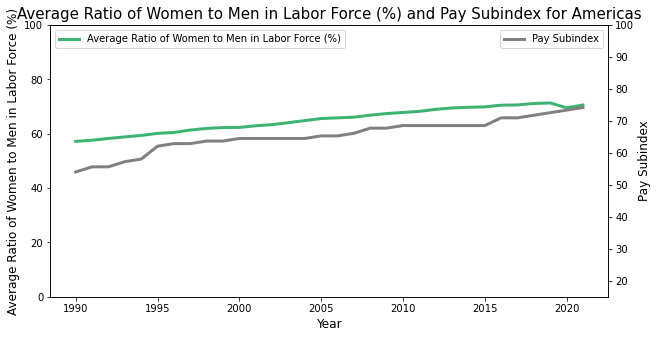

In [137]:
#Americas
AmericasRP = ratioPayRegiondf[ratioWorkRegiondf['ISO_region'] == 'Americas']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Ratio of Women to Men in Labor Force (%) and Pay Subindex for Americas', fontsize = 15) #set title
x.plot(AmericasRP['year'], AmericasRP['Ratio Women Labor'], color='mediumseagreen', linewidth = 3.0) #set first yaxis data
x2.plot(AmericasRP['year'], AmericasRP['PAY'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #set first yaxis label
x2.set_ylabel('Pay Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Ratio of Women to Men in Labor Force (%)'], loc='upper left') #position legend
x2.legend(['Pay Subindex'], loc='upper right') #position legend
x.set_ylim([0,100]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('9_Avg_Ratio_Women_Labor_PaySubindex_Americas.jpg') #save as jpg file
plt.show()

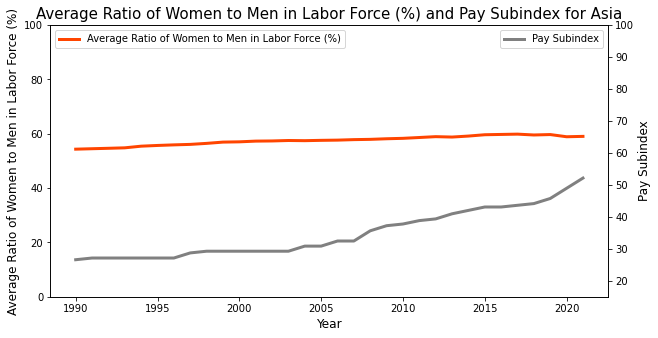

In [138]:
#Asia
AsiaRP = ratioPayRegiondf[ratioWorkRegiondf['ISO_region'] == 'Asia']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Ratio of Women to Men in Labor Force (%) and Pay Subindex for Asia', fontsize = 15) #set title
x.plot(AsiaRP['year'], AsiaRP['Ratio Women Labor'], color='orangered', linewidth = 3.0) #set first yaxis data
x2.plot(AsiaRP['year'], AsiaRP['PAY'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #set first yaxis label
x2.set_ylabel('Pay Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Ratio of Women to Men in Labor Force (%)'], loc='upper left') #position legend
x2.legend(['Pay Subindex'], loc='upper right') #position legend
x.set_ylim([0,100]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('9_Avg_Ratio_Women_Labor_PaySubindex_Asia.jpg') #save as jpg file
plt.show()

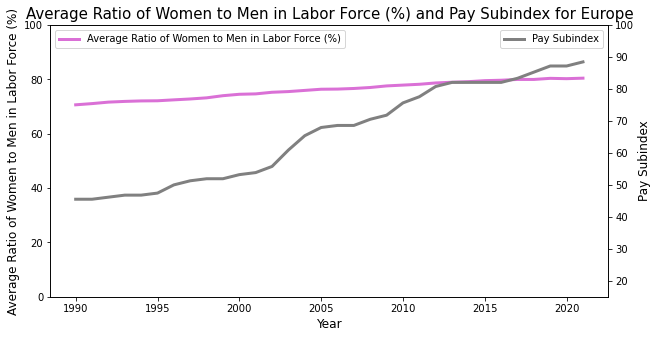

In [139]:
#Europe
EuropeRP = ratioPayRegiondf[ratioWorkRegiondf['ISO_region'] == 'Europe']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Ratio of Women to Men in Labor Force (%) and Pay Subindex for Europe', fontsize = 15) #set title
x.plot(EuropeRP['year'], EuropeRP['Ratio Women Labor'], color='orchid', linewidth = 3.0) #set first yaxis data
x2.plot(EuropeRP['year'], EuropeRP['PAY'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #set first yaxis label
x2.set_ylabel('Pay Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Ratio of Women to Men in Labor Force (%)'], loc='upper left') #position legend
x2.legend(['Pay Subindex'], loc='upper right') #position legend
x.set_ylim([0,100]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('9_Avg_Ratio_Women_Labor_PaySubindex_Europe.jpg') #save as jpg file
plt.show()

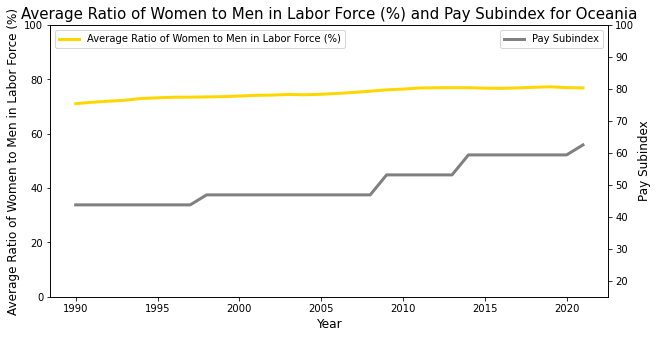

In [140]:
#Oceania
OceaniaRP = ratioPayRegiondf[ratioWorkRegiondf['ISO_region'] == 'Oceania']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Ratio of Women to Men in Labor Force (%) and Pay Subindex for Oceania', fontsize = 15) #set title
x.plot(OceaniaRP['year'], OceaniaRP['Ratio Women Labor'], color='gold', linewidth = 3.0) #set first yaxis data
x2.plot(OceaniaRP['year'], OceaniaRP['PAY'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #set first yaxis label
x2.set_ylabel('Pay Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Ratio of Women to Men in Labor Force (%)'], loc='upper left') #position legend
x2.legend(['Pay Subindex'], loc='upper right') #position legend
x.set_ylim([0,100]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('9_Avg_Ratio_Women_Labor_PaySubindex_Oceania.jpg') #save as jpg file
plt.show()

In [141]:
#I'm curious of the Parenthood subratio is any more closly aligned with the ratio of women to men in labor force
#look at the relationship of these two variables over time by region
#First group the data
ratioParentRegion = ratioindexdf.groupby(['ISO_region', 'year']).agg({'Ratio Women Labor':'mean', 'PARENTHOOD':'mean'}) #groupby both ISO region and year
#Convert the pivot table to dataframe
ratioParentRegiondf = ratioParentRegion.reset_index()
ratioParentRegiondf.head()

,ISO_region,year,Ratio Women Labor,PARENTHOOD
0,Africa,1990,71.511156,21.132075
1,Africa,1991,71.588618,21.886792
2,Africa,1992,71.731239,22.641509
3,Africa,1993,71.898081,23.396226
4,Africa,1994,72.180330,25.660377


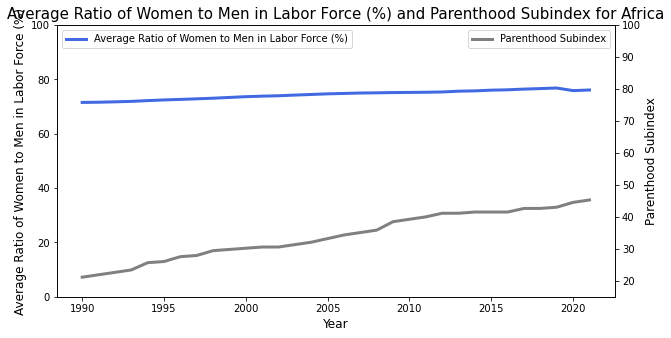

In [142]:
#Now split out Africa first
AfricaRPH = ratioParentRegiondf[ratioParentRegiondf['ISO_region'] == 'Africa']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Ratio of Women to Men in Labor Force (%) and Parenthood Subindex for Africa', fontsize = 15) #set title
x.plot(AfricaRPH['year'], AfricaRPH['Ratio Women Labor'], color='royalblue', linewidth = 3.0) #set first yaxis data
x2.plot(AfricaRPH['year'], AfricaRPH['PARENTHOOD'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #set first yaxis label
x2.set_ylabel('Parenthood Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Ratio of Women to Men in Labor Force (%)'], loc='upper left') #position legend
x2.legend(['Parenthood Subindex'], loc='upper right') #position legend
x.set_ylim([0,100]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('9_Avg_Ratio_Women_Labor_ParentSubindex_Africa.jpg') #save as jpg file
plt.show()

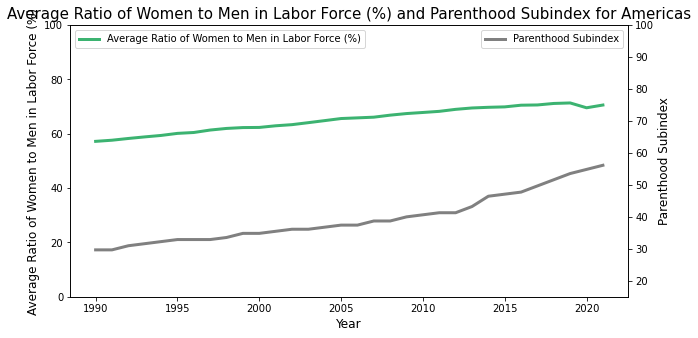

In [143]:
#Americas
AmericasRPH = ratioParentRegiondf[ratioParentRegiondf['ISO_region'] == 'Americas']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Ratio of Women to Men in Labor Force (%) and Parenthood Subindex for Americas', fontsize = 15) #set title
x.plot(AmericasRPH['year'], AmericasRPH['Ratio Women Labor'], color='mediumseagreen', linewidth = 3.0) #set first yaxis data
x2.plot(AmericasRPH['year'], AmericasRPH['PARENTHOOD'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #set first yaxis label
x2.set_ylabel('Parenthood Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Ratio of Women to Men in Labor Force (%)'], loc='upper left') #position legend
x2.legend(['Parenthood Subindex'], loc='upper right') #position legend
x.set_ylim([0,100]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('9_Avg_Ratio_Women_Labor_ParentSubindex_Americas.jpg') #save as jpg file
plt.show()

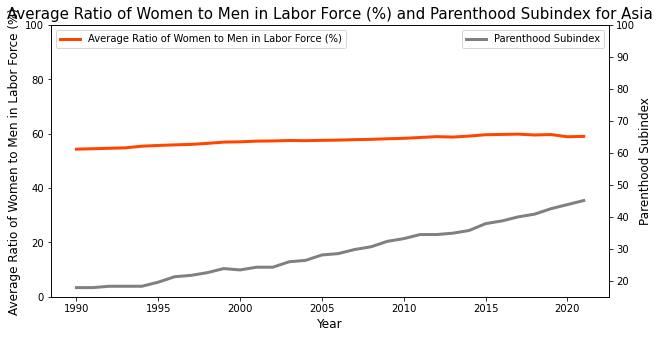

In [144]:
#Asia
AsiaRPH = ratioParentRegiondf[ratioParentRegiondf['ISO_region'] == 'Asia']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Ratio of Women to Men in Labor Force (%) and Parenthood Subindex for Asia', fontsize = 15) #set title
x.plot(AsiaRPH['year'], AsiaRPH['Ratio Women Labor'], color='orangered', linewidth = 3.0) #set first yaxis data
x2.plot(AsiaRPH['year'], AsiaRPH['PARENTHOOD'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #set first yaxis label
x2.set_ylabel('Parenthood Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Ratio of Women to Men in Labor Force (%)'], loc='upper left') #position legend
x2.legend(['Parenthood Subindex'], loc='upper right') #position legend
x.set_ylim([0,100]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('9_Avg_Ratio_Women_Labor_ParentSubindex_Asia.jpg') #save as jpg file
plt.show()

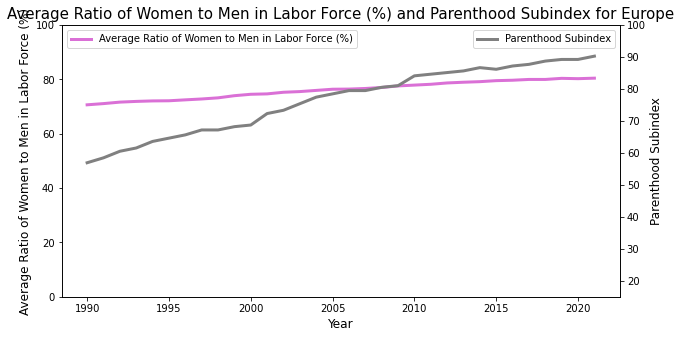

In [145]:
#Europe
EuropeRPH = ratioParentRegiondf[ratioParentRegiondf['ISO_region'] == 'Europe']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Ratio of Women to Men in Labor Force (%) and Parenthood Subindex for Europe', fontsize = 15) #set title
x.plot(EuropeRPH['year'], EuropeRPH['Ratio Women Labor'], color='orchid', linewidth = 3.0) #set first yaxis data
x2.plot(EuropeRPH['year'], EuropeRPH['PARENTHOOD'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #set first yaxis label
x2.set_ylabel('Parenthood Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Ratio of Women to Men in Labor Force (%)'], loc='upper left') #position legend
x2.legend(['Parenthood Subindex'], loc='upper right') #position legend
x.set_ylim([0,100]) #set min and max for axis 1
x2.set_ylim([15,100]) #set min and max for axis 2
plt.savefig('9_Avg_Ratio_Women_Labor_ParentSubindex_Europe.jpg') #save as jpg file
plt.show()

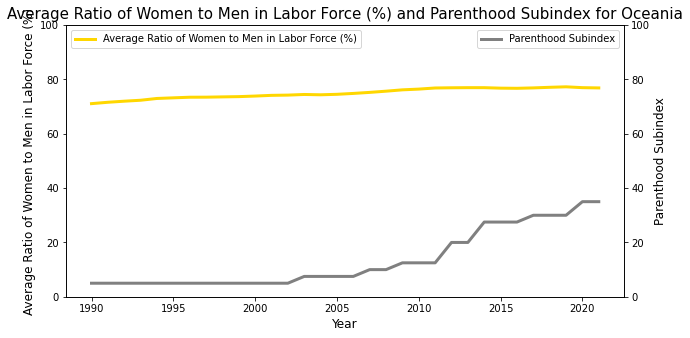

In [146]:
#Oceania
OceaniaRPH = ratioParentRegiondf[ratioParentRegiondf['ISO_region'] == 'Oceania']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Ratio of Women to Men in Labor Force (%) and Parenthood Subindex for Oceania', fontsize = 15) #set title
x.plot(OceaniaRPH['year'], OceaniaRPH['Ratio Women Labor'], color='gold', linewidth = 3.0) #set first yaxis data
x2.plot(OceaniaRPH['year'], OceaniaRPH['PARENTHOOD'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Ratio of Women to Men in Labor Force (%)', fontsize = 12) #set first yaxis label
x2.set_ylabel('Parenthood Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Ratio of Women to Men in Labor Force (%)'], loc='upper left') #position legend
x2.legend(['Parenthood Subindex'], loc='upper right') #position legend
x.set_ylim([0,100]) #set min and max for axis 1
x2.set_ylim([0,100]) #set min and max for axis 2 #I have to change the axis for this region because the values are so low until 2010
plt.savefig('9_Avg_Ratio_Women_Labor_ParentSubindex_Oceania.jpg') #save as jpg file
plt.show()

In [147]:
#Q10 What is the relation of childhood mortality relate to the Parenthood subindex?
#I need to bring in a new dataset to explore this topic.

In [148]:
#This data is the mortality rate under age 5, per 1,000 live births
childdata = pd.read_csv(r'C:\\Users\\krist\\programska\\Project\\API_SH.DYN.MORT_DS2_en_csv_v2_4019294.csv', skiprows =4 ) #skip top 4 rows padding the dataset
#read necessary columns into dataframe
childdf = pd.DataFrame(childdata, columns = ['Country Code', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
childdf.head()  

,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFE,165.801528,164.128976,162.511815,161.204106,161.556769,156.602259,153.891123,150.621927,146.771985,...,82.057484,78.250071,74.816673,71.794958,69.138157,66.515928,64.243994,62.072936,60.054150,58.158650
2,AFG,178.400000,172.200000,166.300000,160.700000,155.500000,150.600000,146.000000,141.500000,137.300000,...,84.000000,80.300000,76.900000,73.600000,70.400000,67.500000,64.800000,62.300000,60.100000,58.000000
3,AFW,198.083687,196.600992,195.040991,193.397250,191.446591,189.019290,186.170120,182.712236,178.743120,...,118.039326,114.997108,112.191190,109.696287,107.291693,104.637694,102.032086,99.291140,96.494289,93.627023
4,AGO,222.800000,222.600000,222.700000,222.700000,222.500000,221.700000,220.000000,217.400000,213.800000,...,112.500000,105.100000,98.500000,92.900000,88.100000,84.100000,80.600000,77.300000,74.200000,71.500000


In [149]:
#rename some columns so they work with the other data tables
childdf.columns = ['ISO_code', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
childdf.head()

,ISO_code,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFE,165.801528,164.128976,162.511815,161.204106,161.556769,156.602259,153.891123,150.621927,146.771985,...,82.057484,78.250071,74.816673,71.794958,69.138157,66.515928,64.243994,62.072936,60.054150,58.158650
2,AFG,178.400000,172.200000,166.300000,160.700000,155.500000,150.600000,146.000000,141.500000,137.300000,...,84.000000,80.300000,76.900000,73.600000,70.400000,67.500000,64.800000,62.300000,60.100000,58.000000
3,AFW,198.083687,196.600992,195.040991,193.397250,191.446591,189.019290,186.170120,182.712236,178.743120,...,118.039326,114.997108,112.191190,109.696287,107.291693,104.637694,102.032086,99.291140,96.494289,93.627023
4,AGO,222.800000,222.600000,222.700000,222.700000,222.500000,221.700000,220.000000,217.400000,213.800000,...,112.500000,105.100000,98.500000,92.900000,88.100000,84.100000,80.600000,77.300000,74.200000,71.500000


In [150]:
#I want to convert to a tall dataframe so it is easier to merge with the WBL data
childdf = childdf.set_index('ISO_code') #make ISO code my index
tallchilddf = childdf.stack() #stack to make tall
tallchilddf.head()

ISO_code      
AFE       1990    165.801528
          1991    164.128976
          1992    162.511815
          1993    161.204106
          1994    161.556769
dtype: float64

In [151]:
#reset index again so it fills in on all the rows
tallchilddf2 = tallchilddf.reset_index()
#rename the columns
tallchilddf2.columns=['ISO_code', 'year', 'Child Mortality']
tallchilddf2.head()

,ISO_code,year,Child Mortality
0,AFE,1990,165.801528
1,AFE,1991,164.128976
2,AFE,1992,162.511815
3,AFE,1993,161.204106
4,AFE,1994,161.556769


In [152]:
#Check out datatypes
tallchilddf2.dtypes
#year needs to be int
tallchilddf3 = tallchilddf2.astype({'year':'int64', 'Child Mortality':'float'})
tallchilddf3.dtypes

ISO_code            object
year                 int64
Child Mortality    float64
dtype: object

In [153]:
#Now add this table to our WBL Data
childindexdf = pd.merge(tallchilddf3, indexdf, how='left', on=['ISO_code', 'year']) #left join and link on ISO code
childindexdf.head()

,ISO_code,year,Child Mortality,country,ISO_region,ISO_subregion,ISO_intermed,region,income_group,INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTRE,ASSETS,PENSION
0,AFE,1990,165.801528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFE,1991,164.128976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFE,1992,162.511815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFE,1993,161.204106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFE,1994,161.556769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
#Omit rows that have blank data and save in new dataframe. Some countries just don't match between the two data tables like Aruba
childindexdf.dropna(subset = ['country'], inplace = True)
childindexdf = childindexdf.sort_values(by=['ISO_region']) #sort so that the charts have consistent colors
childindexdf.head()

,ISO_code,year,Child Mortality,country,ISO_region,ISO_subregion,ISO_intermed,region,income_group,INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTRE,ASSETS,PENSION
7470,ZWE,2020,53.9,Zimbabwe,Africa,Sub-Saharan Africa,Eastern Africa,Sub-Saharan Africa,Lower middle income,86.875,100.0,100.0,75.0,80.0,40.0,100.0,100.0,100.0
6077,SSD,1991,245.8,South Sudan,Africa,Sub-Saharan Africa,Eastern Africa,Sub-Saharan Africa,Low income,41.250,75.0,25.0,0.0,80.0,0.0,75.0,0.0,75.0
6076,SSD,1990,250.5,South Sudan,Africa,Sub-Saharan Africa,Eastern Africa,Sub-Saharan Africa,Low income,35.000,75.0,25.0,0.0,80.0,0.0,75.0,0.0,25.0
6013,SOM,2020,114.6,Somalia,Africa,Sub-Saharan Africa,Eastern Africa,Sub-Saharan Africa,Low income,46.875,75.0,50.0,50.0,20.0,40.0,75.0,40.0,25.0
6012,SOM,2019,118.3,Somalia,Africa,Sub-Saharan Africa,Eastern Africa,Sub-Saharan Africa,Low income,46.875,75.0,50.0,50.0,20.0,40.0,75.0,40.0,25.0


In [155]:
#What does child mortality look like over time by region?
#First group the data by region
childdf2 = childindexdf.pivot_table(index = 'year', columns = 'ISO_region', values = 'Child Mortality', aggfunc = ['mean'], fill_value = 0)
childdf2.head()

mean                                          
ISO_region      Africa   Americas       Asia   Europe    Oceania
year                                                            
1990        147.357407  42.894118  67.465217  15.0625  40.266667
1991        145.520370  41.250000  65.267391  14.5775  39.025000
1992        143.875926  39.647059  63.210870  14.5925  37.850000
1993        142.737037  38.117647  61.204348  14.1775  36.783333
1994        143.233333  36.647059  59.176087  13.4750  35.808333

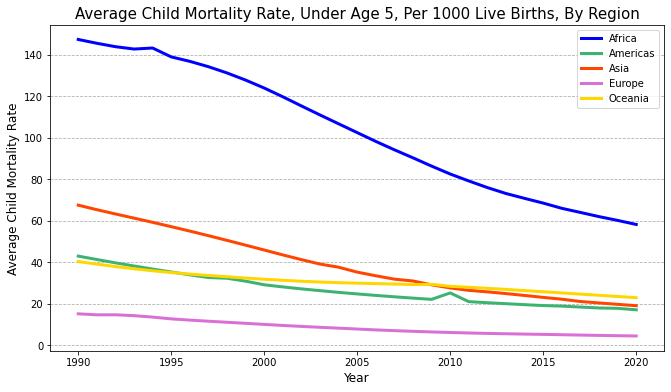

In [156]:
#Then chart the table
plt.rcParams['figure.figsize'] = (11, 6) #Set the parameters for the chart.
childdf2chart = childdf2.plot(kind = 'line', linewidth = 3.0, color =('blue', 'mediumseagreen', 'orangered', 'orchid', 'gold'))
plt.title('Average Child Mortality Rate, Under Age 5, Per 1000 Live Births, By Region', fontsize = 15) #Title the chart.
plt.xlabel('Year', fontsize = 12) #Label xaxis
plt.ylabel('Average Child Mortality Rate', fontsize = 12) #Label yaxis
plt.gca().legend(('Africa', 'Americas', 'Asia','Europe', 'Oceania')) #labels for legend
plt.grid(linestyle='--',axis='y')
plt.savefig('10_Avg_Child_Mortality_By_Region.jpg') #save file
plt.show()

In [157]:
#Because this is a decreasing curve, and I will be comparing to an increasing curve, I wonder if I should invert it for easier comparison
#create a new column
childindexdf['InvertChild Mortality'] = childindexdf['Child Mortality']
#Calculate what percent of children will live past age 5
childindexdf['InvertChild Mortality'] = (1000 - childindexdf['InvertChild Mortality'])/10 #divide by 10 to make it a percent
childindexdf.head()

,ISO_code,year,Child Mortality,country,ISO_region,ISO_subregion,ISO_intermed,region,income_group,INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTRE,ASSETS,PENSION,InvertChild Mortality
7470,ZWE,2020,53.9,Zimbabwe,Africa,Sub-Saharan Africa,Eastern Africa,Sub-Saharan Africa,Lower middle income,86.875,100.0,100.0,75.0,80.0,40.0,100.0,100.0,100.0,94.61
6077,SSD,1991,245.8,South Sudan,Africa,Sub-Saharan Africa,Eastern Africa,Sub-Saharan Africa,Low income,41.250,75.0,25.0,0.0,80.0,0.0,75.0,0.0,75.0,75.42
6076,SSD,1990,250.5,South Sudan,Africa,Sub-Saharan Africa,Eastern Africa,Sub-Saharan Africa,Low income,35.000,75.0,25.0,0.0,80.0,0.0,75.0,0.0,25.0,74.95
6013,SOM,2020,114.6,Somalia,Africa,Sub-Saharan Africa,Eastern Africa,Sub-Saharan Africa,Low income,46.875,75.0,50.0,50.0,20.0,40.0,75.0,40.0,25.0,88.54
6012,SOM,2019,118.3,Somalia,Africa,Sub-Saharan Africa,Eastern Africa,Sub-Saharan Africa,Low income,46.875,75.0,50.0,50.0,20.0,40.0,75.0,40.0,25.0,88.17


In [158]:
#Now pivot to group the data again by year and region
childdf2 = childindexdf.pivot_table(index = 'year', columns = 'ISO_region', values = 'InvertChild Mortality', aggfunc = ['mean'], fill_value = 0)
childdf2.head()

mean                                           
ISO_region     Africa   Americas       Asia    Europe    Oceania
year                                                            
1990        85.264259  95.710588  93.253478  98.49375  95.973333
1991        85.447963  95.875000  93.473261  98.54225  96.097500
1992        85.612407  96.035294  93.678913  98.54075  96.215000
1993        85.726296  96.188235  93.879565  98.58225  96.321667
1994        85.676667  96.335294  94.082391  98.65250  96.419167

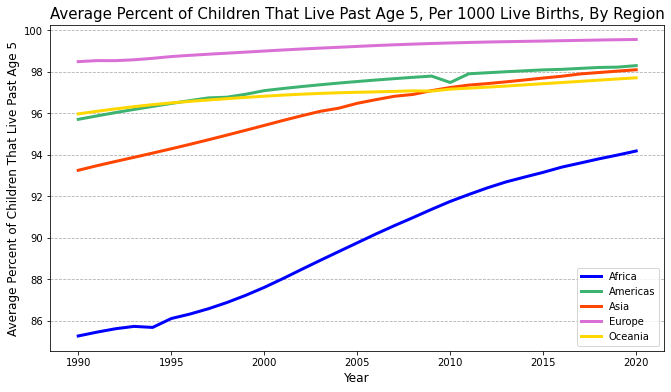

In [159]:
#Then chart the table
plt.rcParams['figure.figsize'] = (11, 6) #Set the parameters for the chart.
childdf2chart = childdf2.plot(kind = 'line', linewidth = 3.0, color = ('blue', 'mediumseagreen', 'orangered', 'orchid', 'gold'))
plt.title('Average Percent of Children That Live Past Age 5, Per 1000 Live Births, By Region', fontsize = 15) #Title the chart.
plt.xlabel('Year', fontsize = 12) #Label xaxis
plt.ylabel('Average Percent of Children That Live Past Age 5', fontsize = 12) #Label yaxis
plt.gca().legend(('Africa', 'Americas', 'Asia','Europe', 'Oceania')) #labels for legend
plt.grid(linestyle='--',axis='y')
plt.savefig('10_Avg_Child_Life_By_Region.jpg') #save file
plt.show()

In [160]:
#look at the relationship of these two variables (percent of children that live and Parenthood subindex) over time by region
#First group the data
childParentRegion = childindexdf.groupby(['ISO_region', 'year']).agg({'InvertChild Mortality':'mean', 'PARENTHOOD':'mean'}) #groupby both ISO region and year
childParentRegion.head()

InvertChild Mortality  PARENTHOOD
ISO_region year                                   
Africa     1990              85.264259   21.111111
           1991              85.447963   21.851852
           1992              85.612407   22.592593
           1993              85.726296   23.333333
           1994              85.676667   25.555556

In [161]:
#Convert the pivot table to dataframe
childParentRegiondf = childParentRegion.reset_index()
childParentRegiondf

,ISO_region,year,InvertChild Mortality,PARENTHOOD
0,Africa,1990,85.264259,21.111111
1,Africa,1991,85.447963,21.851852
2,Africa,1992,85.612407,22.592593
3,Africa,1993,85.726296,23.333333
4,Africa,1994,85.676667,25.555556
...,...,...,...,...
150,Oceania,2016,97.485833,18.333333
151,Oceania,2017,97.543333,21.666667
152,Oceania,2018,97.600833,21.666667
153,Oceania,2019,97.657500,21.666667


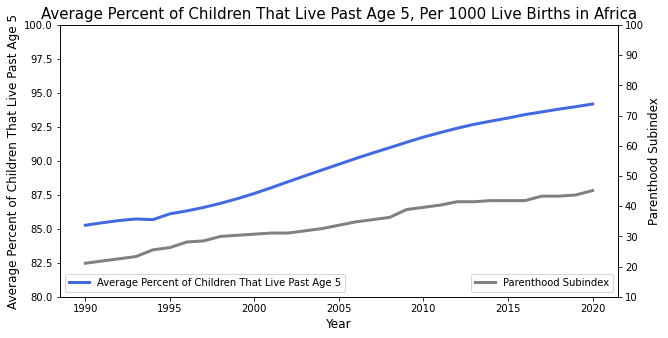

In [162]:
#Now split out Africa first
AfricaCP = childParentRegiondf[childParentRegiondf['ISO_region'] == 'Africa']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Percent of Children That Live Past Age 5, Per 1000 Live Births in Africa', fontsize = 15) #set title
x.plot(AfricaCP['year'], AfricaCP['InvertChild Mortality'], color='royalblue', linewidth = 3.0) #set first yaxis data
x2.plot(AfricaCP['year'], AfricaCP['PARENTHOOD'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Percent of Children That Live Past Age 5', fontsize = 12) #set first yaxis label
x2.set_ylabel('Parenthood Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Percent of Children That Live Past Age 5'], loc='lower left') #position legend
x2.legend(['Parenthood Subindex'], loc='lower right') #position legend
x.set_ylim([80,100]) #set min and max for axis 1
x2.set_ylim([10,100]) #set min and max for axis 2
plt.savefig('10_Avg_Child_Live_Parent_Africa.jpg') #save as jpg file
plt.show()

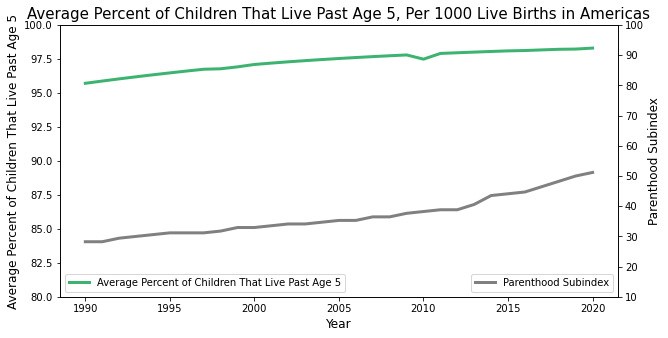

In [163]:
#Americas
AmericasCP = childParentRegiondf[childParentRegiondf['ISO_region'] == 'Americas']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Percent of Children That Live Past Age 5, Per 1000 Live Births in Americas', fontsize = 15) #set title
x.plot(AmericasCP['year'], AmericasCP['InvertChild Mortality'], color='mediumseagreen', linewidth = 3.0) #set first yaxis data
x2.plot(AmericasCP['year'], AmericasCP['PARENTHOOD'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Percent of Children That Live Past Age 5', fontsize = 12) #set first yaxis label
x2.set_ylabel('Parenthood Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Percent of Children That Live Past Age 5'], loc='lower left') #position legend
x2.legend(['Parenthood Subindex'], loc='lower right') #position legend
x.set_ylim([80,100]) #set min and max for axis 1
x2.set_ylim([10,100]) #set min and max for axis 2
plt.savefig('10_Avg_Child_Live_Parent_Americas.jpg') #save as jpg file
plt.show()

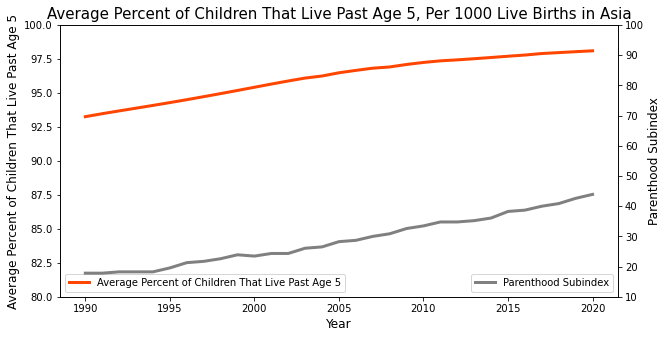

In [164]:
#Asia
AsiaCP = childParentRegiondf[childParentRegiondf['ISO_region'] == 'Asia']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Percent of Children That Live Past Age 5, Per 1000 Live Births in Asia', fontsize = 15) #set title
x.plot(AsiaCP['year'], AsiaCP['InvertChild Mortality'], color='orangered', linewidth = 3.0) #set first yaxis data
x2.plot(AsiaCP['year'], AsiaCP['PARENTHOOD'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Percent of Children That Live Past Age 5', fontsize = 12) #set first yaxis label
x2.set_ylabel('Parenthood Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Percent of Children That Live Past Age 5'], loc='lower left') #position legend
x2.legend(['Parenthood Subindex'], loc='lower right') #position legend
x.set_ylim([80,100]) #set min and max for axis 1
x2.set_ylim([10,100]) #set min and max for axis 2
plt.savefig('10_Avg_Child_Live_Parent_Asia.jpg') #save as jpg file
plt.show()

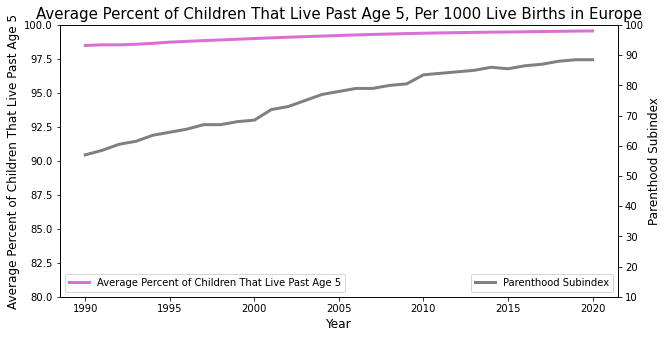

In [165]:
#Europe
EuropeCP = childParentRegiondf[childParentRegiondf['ISO_region'] == 'Europe']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Percent of Children That Live Past Age 5, Per 1000 Live Births in Europe', fontsize = 15) #set title
x.plot(EuropeCP['year'], EuropeCP['InvertChild Mortality'], color='orchid', linewidth = 3.0) #set first yaxis data
x2.plot(EuropeCP['year'], EuropeCP['PARENTHOOD'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Percent of Children That Live Past Age 5', fontsize = 12) #set first yaxis label
x2.set_ylabel('Parenthood Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Percent of Children That Live Past Age 5'], loc='lower left') #position legend
x2.legend(['Parenthood Subindex'], loc='lower right') #position legend
x.set_ylim([80,100]) #set min and max for axis 1
x2.set_ylim([10,100]) #set min and max for axis 2
plt.savefig('10_Avg_Child_Live_Parent_Europe.jpg') #save as jpg file
plt.show()

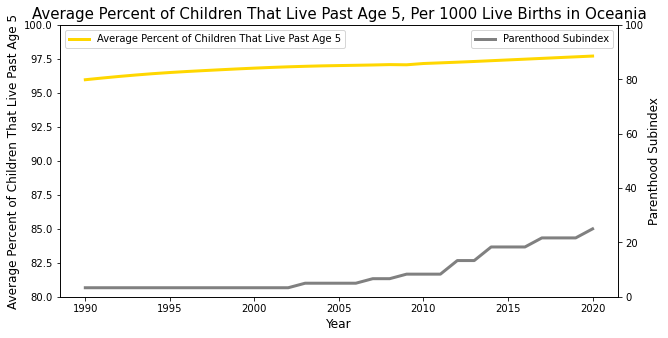

In [166]:
#Oceania
OceaniaCP = childParentRegiondf[childParentRegiondf['ISO_region'] == 'Oceania']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Percent of Children That Live Past Age 5, Per 1000 Live Births in Oceania', fontsize = 15) #set title
x.plot(OceaniaCP['year'], OceaniaCP['InvertChild Mortality'], color='gold', linewidth = 3.0) #set first yaxis data
x2.plot(OceaniaCP['year'], OceaniaCP['PARENTHOOD'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Percent of Children That Live Past Age 5', fontsize = 12) #set first yaxis label
x2.set_ylabel('Parenthood Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Percent of Children That Live Past Age 5'], loc='upper left') #position legend
x2.legend(['Parenthood Subindex'], loc='upper right') #position legend
x.set_ylim([80,100]) #set min and max for axis 1
x2.set_ylim([0,100]) #set min and max for axis 2 #Need to lower the axis because the score is quite low
plt.savefig('10_Avg_Child_Live_Parent_Oceania.jpg') #save as jpg file
plt.show()

In [167]:
#Q11 How does gross national income per capita relate to the WBL Index? To the pay subindex?
#bring in data
GNIdata = pd.read_csv(r'C:\\Users\\krist\\programska\\Project\\API_NY.GNP.PCAP.CD_DS2_en_csv_v2_4029355.csv', skiprows =4 ) #skip top 4 rows padding the dataset
#read necessary columns into dataframe
GNIdf = pd.DataFrame(GNIdata, columns = ['Country Code', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
GNIdf.head()  

,Country Code,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABW,16230.000000,16370.000000,17220.000000,17620.000000,17880.000000,20000.000000,19170.000000,17890.000000,20070.000000,...,22450.000000,23520.000000,24510.000000,25350.000000,26560.000000,26840.000000,27120.000000,NaN,NaN,NaN
1,AFE,733.618397,748.937217,750.465096,693.262510,672.083021,666.869826,639.798492,624.488639,674.623360,...,1563.676371,1669.134226,1697.844163,1677.094818,1579.434512,1475.405527,1441.531746,1494.710171,1535.776856,1406.289007
2,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,530.000000,630.000000,650.000000,630.000000,590.000000,550.000000,530.000000,510.000000,520.000000,500.000000
3,AFW,407.933065,427.100409,465.582078,463.578133,465.941051,456.075182,480.245828,525.026892,587.682867,...,1605.673050,1774.034998,1931.807956,2061.522937,2005.476912,1782.153990,1611.489483,1611.865620,1669.153323,1654.425660
4,AGO,370.000000,360.000000,450.000000,410.000000,330.000000,360.000000,390.000000,590.000000,710.000000,...,3410.000000,4170.000000,4780.000000,5010.000000,4520.000000,3770.000000,3450.000000,3210.000000,2970.000000,2140.000000


In [168]:
#rename some columns so they work with the other data tables
GNIdf.columns = ['ISO_code', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
GNIdf.head()

,ISO_code,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABW,16230.000000,16370.000000,17220.000000,17620.000000,17880.000000,20000.000000,19170.000000,17890.000000,20070.000000,...,22450.000000,23520.000000,24510.000000,25350.000000,26560.000000,26840.000000,27120.000000,NaN,NaN,NaN
1,AFE,733.618397,748.937217,750.465096,693.262510,672.083021,666.869826,639.798492,624.488639,674.623360,...,1563.676371,1669.134226,1697.844163,1677.094818,1579.434512,1475.405527,1441.531746,1494.710171,1535.776856,1406.289007
2,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,530.000000,630.000000,650.000000,630.000000,590.000000,550.000000,530.000000,510.000000,520.000000,500.000000
3,AFW,407.933065,427.100409,465.582078,463.578133,465.941051,456.075182,480.245828,525.026892,587.682867,...,1605.673050,1774.034998,1931.807956,2061.522937,2005.476912,1782.153990,1611.489483,1611.865620,1669.153323,1654.425660
4,AGO,370.000000,360.000000,450.000000,410.000000,330.000000,360.000000,390.000000,590.000000,710.000000,...,3410.000000,4170.000000,4780.000000,5010.000000,4520.000000,3770.000000,3450.000000,3210.000000,2970.000000,2140.000000


In [169]:
#I want to convert to a tall dataframe so it is easier to merge with the WBL data
GNIdf = GNIdf.set_index('ISO_code') #make ISO code my index
tallGNIdf = GNIdf.stack() #stack to make tall
tallGNIdf.head()

ISO_code      
ABW       1995    16230.0
          1996    16370.0
          1997    17220.0
          1998    17620.0
          1999    17880.0
dtype: float64

In [170]:
#reset index again so it fills in on all the rows
tallGNIdf2 = tallGNIdf.reset_index()
#rename the columns
tallGNIdf2.columns=['ISO_code', 'year', 'GNI']
tallGNIdf2.head()

,ISO_code,year,GNI
0,ABW,1995,16230.0
1,ABW,1996,16370.0
2,ABW,1997,17220.0
3,ABW,1998,17620.0
4,ABW,1999,17880.0


In [171]:
#Check out datatypes
tallGNIdf2.dtypes
#year needs to be int
tallGNIdf3 = tallGNIdf2.astype({'year':'int64', 'GNI':'float'})
tallGNIdf3.dtypes

ISO_code     object
year          int64
GNI         float64
dtype: object

In [172]:
#Now add this table to our WBL Data
GNIindexdf = pd.merge(tallGNIdf3, indexdf, how='left', on=['ISO_code', 'year']) #left join and link on ISO code
GNIindexdf.head()

,ISO_code,year,GNI,country,ISO_region,ISO_subregion,ISO_intermed,region,income_group,INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTRE,ASSETS,PENSION
0,ABW,1995,16230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,1996,16370.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,1997,17220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,1998,17620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,1999,17880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
#Omit rows that have blank data and save in new dataframe. Some countries just don't match between the two data tables like Aruba
GNIindexdf.dropna(subset = ['country'], inplace = True)
GNIindexdf = GNIindexdf.sort_values(by=['ISO_region']) #sort so that the charts have consistent colors
GNIindexdf.head()

,ISO_code,year,GNI,country,ISO_region,ISO_subregion,ISO_intermed,region,income_group,INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTRE,ASSETS,PENSION
6141,ZWE,2020,1140.0,Zimbabwe,Africa,Sub-Saharan Africa,Eastern Africa,Sub-Saharan Africa,Lower middle income,86.875,100.0,100.0,75.0,80.0,40.0,100.0,100.0,100.0
4923,SLE,2004,280.0,Sierra Leone,Africa,Sub-Saharan Africa,Western Africa,Sub-Saharan Africa,Low income,38.125,100.0,0.0,50.0,80.0,0.0,0.0,0.0,75.0
4924,SLE,2005,290.0,Sierra Leone,Africa,Sub-Saharan Africa,Western Africa,Sub-Saharan Africa,Low income,38.125,100.0,0.0,50.0,80.0,0.0,0.0,0.0,75.0
4925,SLE,2006,300.0,Sierra Leone,Africa,Sub-Saharan Africa,Western Africa,Sub-Saharan Africa,Low income,38.125,100.0,0.0,50.0,80.0,0.0,0.0,0.0,75.0
4926,SLE,2007,360.0,Sierra Leone,Africa,Sub-Saharan Africa,Western Africa,Sub-Saharan Africa,Low income,38.125,100.0,0.0,50.0,80.0,0.0,0.0,0.0,75.0


In [174]:
#Make correlation table and print
Corr_GNI = GNIindexdf.corr(method = 'pearson')
Corr_GNI.to_csv('11_Corr_GNI.csv') #save as csv
Corr_GNI

,year,GNI,INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTRE,ASSETS,PENSION
year,1.000000,0.185978,0.302183,0.033335,0.424926,0.217562,0.215763,0.202126,0.231631,0.060698,0.117540
GNI,0.185978,1.000000,0.420574,0.117213,0.302609,0.365168,0.241834,0.322337,0.283087,0.257840,0.258448
INDEX,0.302183,0.420574,1.000000,0.666559,0.784937,0.639279,0.773591,0.629314,0.545069,0.742153,0.325858
MOBILITY,0.033335,0.117213,0.666559,1.000000,0.422032,0.325935,0.642176,0.358181,0.197710,0.490787,-0.011607
WORKPLACE,0.424926,0.302609,0.784937,0.422032,1.000000,0.469120,0.496858,0.455178,0.463147,0.496413,0.129641
PAY,0.217562,0.365168,0.639279,0.325935,0.469120,1.000000,0.382613,0.240918,0.244442,0.276741,0.246244
MARRIAGE,0.215763,0.241834,0.773591,0.642176,0.496858,0.382613,1.000000,0.309048,0.383846,0.660366,0.104950
PARENTHOOD,0.202126,0.322337,0.629314,0.358181,0.455178,0.240918,0.309048,1.000000,0.269005,0.428752,0.077886
ENTRE,0.231631,0.283087,0.545069,0.197710,0.463147,0.244442,0.383846,0.269005,1.000000,0.393436,0.067833
ASSETS,0.060698,0.257840,0.742153,0.490787,0.496413,0.276741,0.660366,0.428752,0.393436,1.000000,0.077114


In [175]:
#What does GNI look like over time by region?
#First group the data by region
GNIdf2 = GNIindexdf.pivot_table(index = 'year', columns = 'ISO_region', values = 'GNI', aggfunc = ['mean'])
GNIdf2.head()

mean                                                
ISO_region       Africa     Americas         Asia        Europe Oceania
year                                                                   
1995         959.791667  4446.176471  5160.256410  16687.500000  4893.0
1996         990.625000  4747.647059  5348.000000  17342.758621  5174.0
1997        1038.750000  4942.352941  5685.238095  15793.333333  5342.0
1998        1001.250000  5066.764706  5255.714286  15309.166667  5161.0
1999         977.708333  5840.000000  5126.190476  15268.611111  5040.0

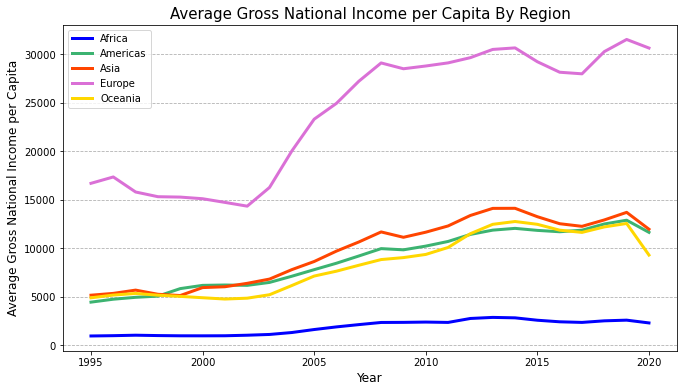

In [176]:
#Then chart the table
plt.rcParams['figure.figsize'] = (11, 6) #Set the parameters for the chart.
GNIdf2chart = GNIdf2.plot(kind = 'line', linewidth = 3.0, color =('blue', 'mediumseagreen', 'orangered', 'orchid', 'gold'))
plt.title('Average Gross National Income per Capita By Region', fontsize = 15) #Title the chart.
plt.xlabel('Year', fontsize = 12) #Label xaxis
plt.ylabel('Average Gross National Income per Capita', fontsize = 12) #Label yaxis
plt.gca().legend(('Africa', 'Americas', 'Asia','Europe', 'Oceania')) #labels for legend
plt.grid(linestyle='--',axis='y')
plt.savefig('11_Avg_GNI_By_Region.jpg') #save file
plt.show()

In [177]:
#look at the relationship of these two variables (GNI and WBL Index) over time by region
#First group the data
GNIIndexRegion = GNIindexdf.groupby(['ISO_region', 'year']).agg({'GNI':'mean', 'INDEX':'mean', 'PAY':'mean'}) #groupby both ISO region and year
GNIIndexRegion.head()

GNI      INDEX        PAY
ISO_region year                                   
Africa     1995   959.791667  48.216146  38.020833
           1996   990.625000  48.867188  39.062500
           1997  1038.750000  49.791667  39.583333
           1998  1001.250000  50.208333  41.145833
           1999   977.708333  50.976562  42.187500

In [178]:
#Convert the pivot table to dataframe
GNIIndexRegiondf = GNIIndexRegion.reset_index()
GNIIndexRegiondf

,ISO_region,year,GNI,INDEX,PAY
0,Africa,1995,959.791667,48.216146,38.020833
1,Africa,1996,990.625000,48.867188,39.062500
2,Africa,1997,1038.750000,49.791667,39.583333
3,Africa,1998,1001.250000,50.208333,41.145833
4,Africa,1999,977.708333,50.976562,42.187500
...,...,...,...,...,...
125,Oceania,2016,11859.166667,66.822917,62.500000
126,Oceania,2017,11631.666667,68.281250,66.666667
127,Oceania,2018,12196.666667,68.281250,66.666667
128,Oceania,2019,12551.666667,68.489583,66.666667


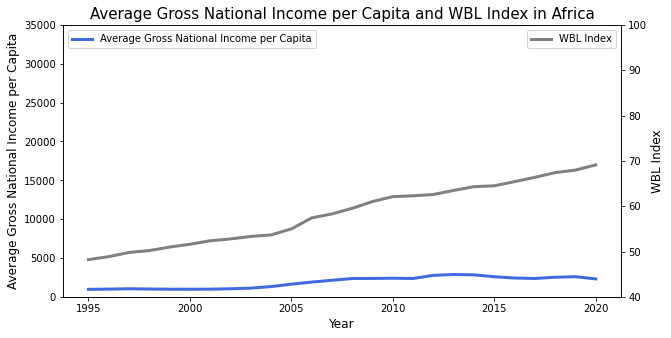

In [179]:
#Now split out Africa first
AfricaGI = GNIIndexRegiondf[GNIIndexRegiondf['ISO_region'] == 'Africa']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Gross National Income per Capita and WBL Index in Africa', fontsize = 15) #set title
x.plot(AfricaGI['year'], AfricaGI['GNI'], color='royalblue', linewidth = 3.0) #set first yaxis data
x2.plot(AfricaGI['year'], AfricaGI['INDEX'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Gross National Income per Capita', fontsize = 12) #set first yaxis label
x2.set_ylabel('WBL Index', fontsize = 12) #set second yaxis label
x.legend(['Average Gross National Income per Capita'], loc='upper left') #position legend
x2.legend(['WBL Index'], loc='upper right') #position legend
x.set_ylim([0,35000]) #set min and max for axis 1
x2.set_ylim([40,100]) #set min and max for axis 2
plt.savefig('11_Avg_GNI_Index_Africa.jpg') #save as jpg file
plt.show()

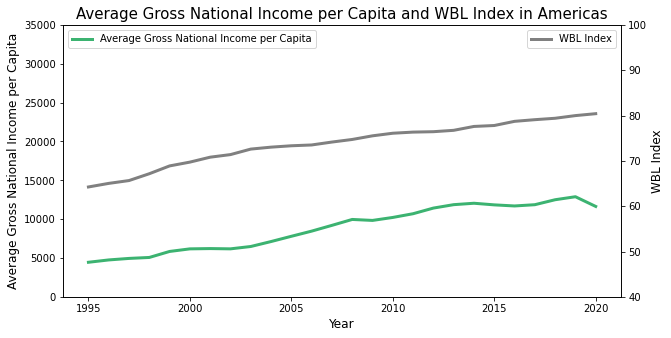

In [180]:
#Americas
AmericasGI = GNIIndexRegiondf[GNIIndexRegiondf['ISO_region'] == 'Americas']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Gross National Income per Capita and WBL Index in Americas', fontsize = 15) #set title
x.plot(AmericasGI['year'], AmericasGI['GNI'], color='mediumseagreen', linewidth = 3.0) #set first yaxis data
x2.plot(AmericasGI['year'], AmericasGI['INDEX'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Gross National Income per Capita', fontsize = 12) #set first yaxis label
x2.set_ylabel('WBL Index', fontsize = 12) #set second yaxis label
x.legend(['Average Gross National Income per Capita'], loc='upper left') #position legend
x2.legend(['WBL Index'], loc='upper right') #position legend
x.set_ylim([0,35000]) #set min and max for axis 1
x2.set_ylim([40,100]) #set min and max for axis 2
plt.savefig('11_Avg_GNI_Index_Americas.jpg') #save as jpg file
plt.show()

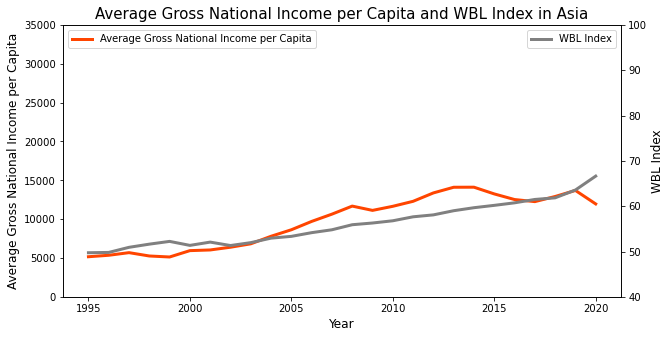

In [181]:
#Asia
AsiaGI = GNIIndexRegiondf[GNIIndexRegiondf['ISO_region'] == 'Asia']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Gross National Income per Capita and WBL Index in Asia', fontsize = 15) #set title
x.plot(AsiaGI['year'], AsiaGI['GNI'], color='orangered', linewidth = 3.0) #set first yaxis data
x2.plot(AsiaGI['year'], AsiaGI['INDEX'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Gross National Income per Capita', fontsize = 12) #set first yaxis label
x2.set_ylabel('WBL Index', fontsize = 12) #set second yaxis label
x.legend(['Average Gross National Income per Capita'], loc='upper left') #position legend
x2.legend(['WBL Index'], loc='upper right') #position legend
x.set_ylim([0,35000]) #set min and max for axis 1
x2.set_ylim([40,100]) #set min and max for axis 2
plt.savefig('11_Avg_GNI_Index_Asia.jpg') #save as jpg file
plt.show()

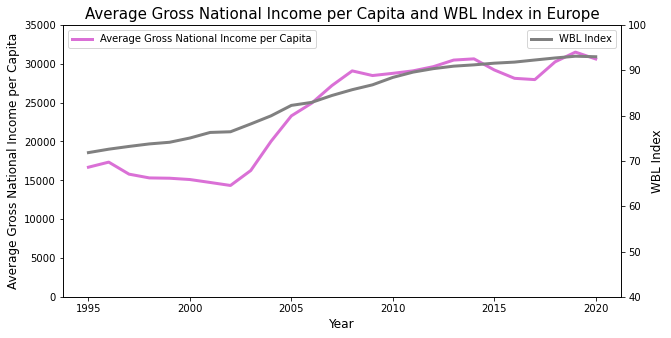

In [182]:
#Europe
EuropeGI = GNIIndexRegiondf[GNIIndexRegiondf['ISO_region'] == 'Europe']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Gross National Income per Capita and WBL Index in Europe', fontsize = 15) #set title
x.plot(EuropeGI['year'], EuropeGI['GNI'], color='orchid', linewidth = 3.0) #set first yaxis data
x2.plot(EuropeGI['year'], EuropeGI['INDEX'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Gross National Income per Capita', fontsize = 12) #set first yaxis label
x2.set_ylabel('WBL Index', fontsize = 12) #set second yaxis label
x.legend(['Average Gross National Income per Capita'], loc='upper left') #position legend
x2.legend(['WBL Index'], loc='upper right') #position legend
x.set_ylim([0,35000]) #set min and max for axis 1
x2.set_ylim([40,100]) #set min and max for axis 2
plt.savefig('11_Avg_GNI_Index_Europe.jpg') #save as jpg file
plt.show()

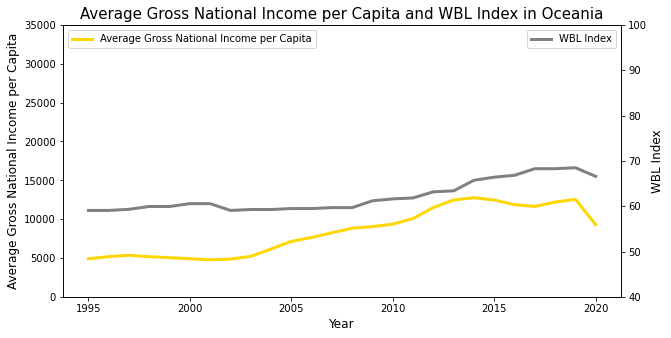

In [183]:
#Oceania
OceaniaGI = GNIIndexRegiondf[GNIIndexRegiondf['ISO_region'] == 'Oceania']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Gross National Income per Capita and WBL Index in Oceania', fontsize = 15) #set title
x.plot(OceaniaGI['year'], OceaniaGI['GNI'], color='gold', linewidth = 3.0) #set first yaxis data
x2.plot(OceaniaGI['year'], OceaniaGI['INDEX'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Gross National Income per Capita', fontsize = 12) #set first yaxis label
x2.set_ylabel('WBL Index', fontsize = 12) #set second yaxis label
x.legend(['Average Gross National Income per Capita'], loc='upper left') #position legend
x2.legend(['WBL Index'], loc='upper right') #position legend
x.set_ylim([0,35000]) #set min and max for axis 1
x2.set_ylim([40,100]) #set min and max for axis 2
plt.savefig('11_Avg_GNI_Index_Oceania.jpg') #save as jpg file
plt.show()

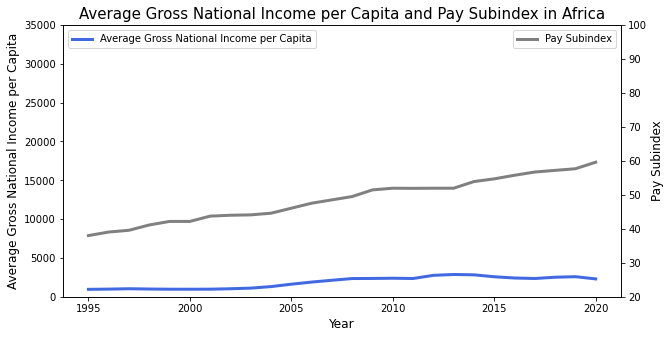

In [184]:
#Do the same charts for Pay subindex
#Now split out Africa first
AfricaGI = GNIIndexRegiondf[GNIIndexRegiondf['ISO_region'] == 'Africa']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Gross National Income per Capita and Pay Subindex in Africa', fontsize = 15) #set title
x.plot(AfricaGI['year'], AfricaGI['GNI'], color='royalblue', linewidth = 3.0) #set first yaxis data
x2.plot(AfricaGI['year'], AfricaGI['PAY'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Gross National Income per Capita', fontsize = 12) #set first yaxis label
x2.set_ylabel('Pay Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Gross National Income per Capita'], loc='upper left') #position legend
x2.legend(['Pay Subindex'], loc='upper right') #position legend
x.set_ylim([0,35000]) #set min and max for axis 1
x2.set_ylim([20,100]) #set min and max for axis 2
plt.savefig('11_Avg_GNI_Pay_Africa.jpg') #save as jpg file
plt.show()

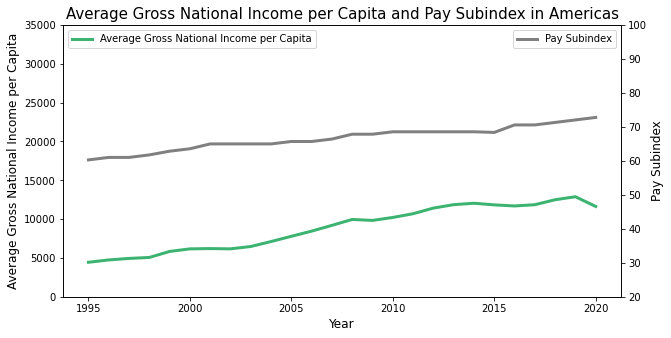

In [185]:
#Americas
AmericasGI = GNIIndexRegiondf[GNIIndexRegiondf['ISO_region'] == 'Americas']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Gross National Income per Capita and Pay Subindex in Americas', fontsize = 15) #set title
x.plot(AmericasGI['year'], AmericasGI['GNI'], color='mediumseagreen', linewidth = 3.0) #set first yaxis data
x2.plot(AmericasGI['year'], AmericasGI['PAY'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Gross National Income per Capita', fontsize = 12) #set first yaxis label
x2.set_ylabel('Pay Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Gross National Income per Capita'], loc='upper left') #position legend
x2.legend(['Pay Subindex'], loc='upper right') #position legend
x.set_ylim([0,35000]) #set min and max for axis 1
x2.set_ylim([20,100]) #set min and max for axis 2
plt.savefig('11_Avg_GNI_Pay_Americas.jpg') #save as jpg file
plt.show()

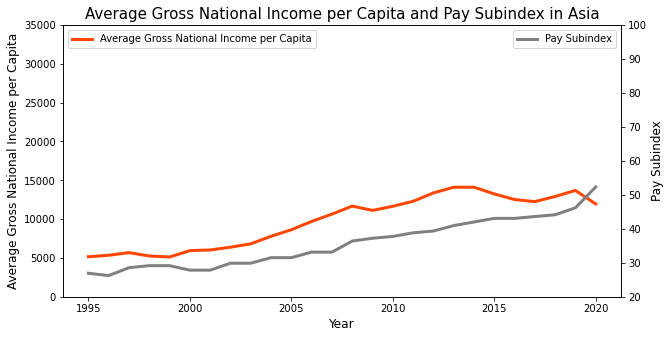

In [186]:
#Asia
AsiaGI = GNIIndexRegiondf[GNIIndexRegiondf['ISO_region'] == 'Asia']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Gross National Income per Capita and Pay Subindex in Asia', fontsize = 15) #set title
x.plot(AsiaGI['year'], AsiaGI['GNI'], color='orangered', linewidth = 3.0) #set first yaxis data
x2.plot(AsiaGI['year'], AsiaGI['PAY'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Gross National Income per Capita', fontsize = 12) #set first yaxis label
x2.set_ylabel('Pay Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Gross National Income per Capita'], loc='upper left') #position legend
x2.legend(['Pay Subindex'], loc='upper right') #position legend
x.set_ylim([0,35000]) #set min and max for axis 1
x2.set_ylim([20,100]) #set min and max for axis 2
plt.savefig('11_Avg_GNI_Pay_Asia.jpg') #save as jpg file
plt.show()

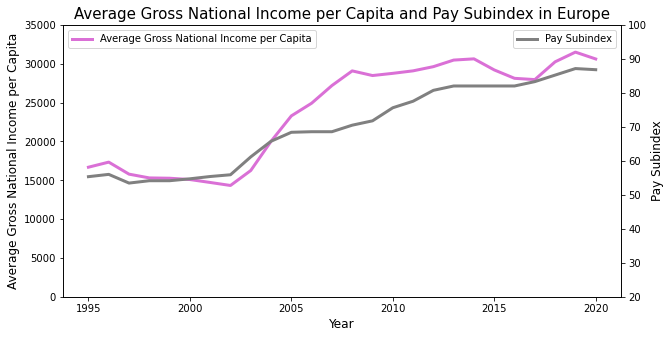

In [187]:
#Europe
EuropeGI = GNIIndexRegiondf[GNIIndexRegiondf['ISO_region'] == 'Europe']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Gross National Income per Capita and Pay Subindex in Europe', fontsize = 15) #set title
x.plot(EuropeGI['year'], EuropeGI['GNI'], color='orchid', linewidth = 3.0) #set first yaxis data
x2.plot(EuropeGI['year'], EuropeGI['PAY'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Gross National Income per Capita', fontsize = 12) #set first yaxis label
x2.set_ylabel('Pay Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Gross National Income per Capita'], loc='upper left') #position legend
x2.legend(['Pay Subindex'], loc='upper right') #position legend
x.set_ylim([0,35000]) #set min and max for axis 1
x2.set_ylim([20,100]) #set min and max for axis 2
plt.savefig('11_Avg_GNI_Pay_Europe.jpg') #save as jpg file
plt.show()

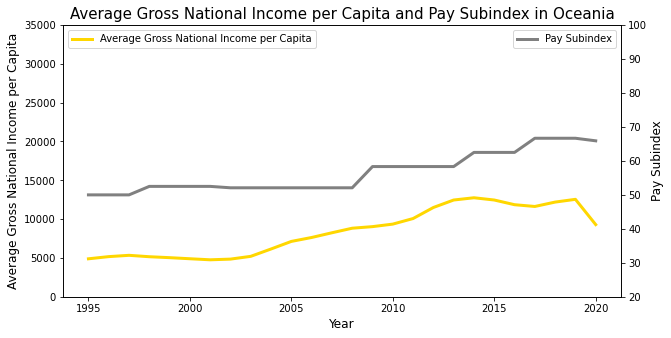

In [188]:
#Oceania
OceaniaGI = GNIIndexRegiondf[GNIIndexRegiondf['ISO_region'] == 'Oceania']
#Then chart the table on dual axis line
fig, x =plt.subplots(figsize=(10,5)) #set size of chart
x2 = x.twinx() #set second axis
x.set_title('Average Gross National Income per Capita and Pay Subindex in Oceania', fontsize = 15) #set title
x.plot(OceaniaGI['year'], OceaniaGI['GNI'], color='gold', linewidth = 3.0) #set first yaxis data
x2.plot(OceaniaGI['year'], OceaniaGI['PAY'], color='gray',linewidth = 3.0) #set second yaxis data
x.set_xlabel('Year', fontsize = 12) #set x axis label
x.set_ylabel('Average Gross National Income per Capita', fontsize = 12) #set first yaxis label
x2.set_ylabel('Pay Subindex', fontsize = 12) #set second yaxis label
x.legend(['Average Gross National Income per Capita'], loc='upper left') #position legend
x2.legend(['Pay Subindex'], loc='upper right') #position legend
x.set_ylim([0,35000]) #set min and max for axis 1
x2.set_ylim([20,100]) #set min and max for axis 2
plt.savefig('11_Avg_GNI_Pay_Oceania.jpg') #save as jpg file
plt.show()